In [48]:
import pandas as pd 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu, kendalltau, kruskal
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet 
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest

from sklearn.decomposition import PCA

#Import des outils de preprocessing : 
from sklearn.preprocessing import OrdinalEncoder

#import package train test set :
from sklearn.model_selection import train_test_split, KFold 

#import package model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#import package mesure precision model :
from sklearn.metrics import accuracy_score, mean_squared_error

#import pour grid search : 

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer #permet de trouver le modele faisant le meilleur score
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve


from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression , SelectPercentile
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.pipeline import Pipeline,FeatureUnion

from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv("/home/ha-brek/Devia_AI/Data/data_assurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
df.duplicated().sum()

1

<AxesSubplot: >

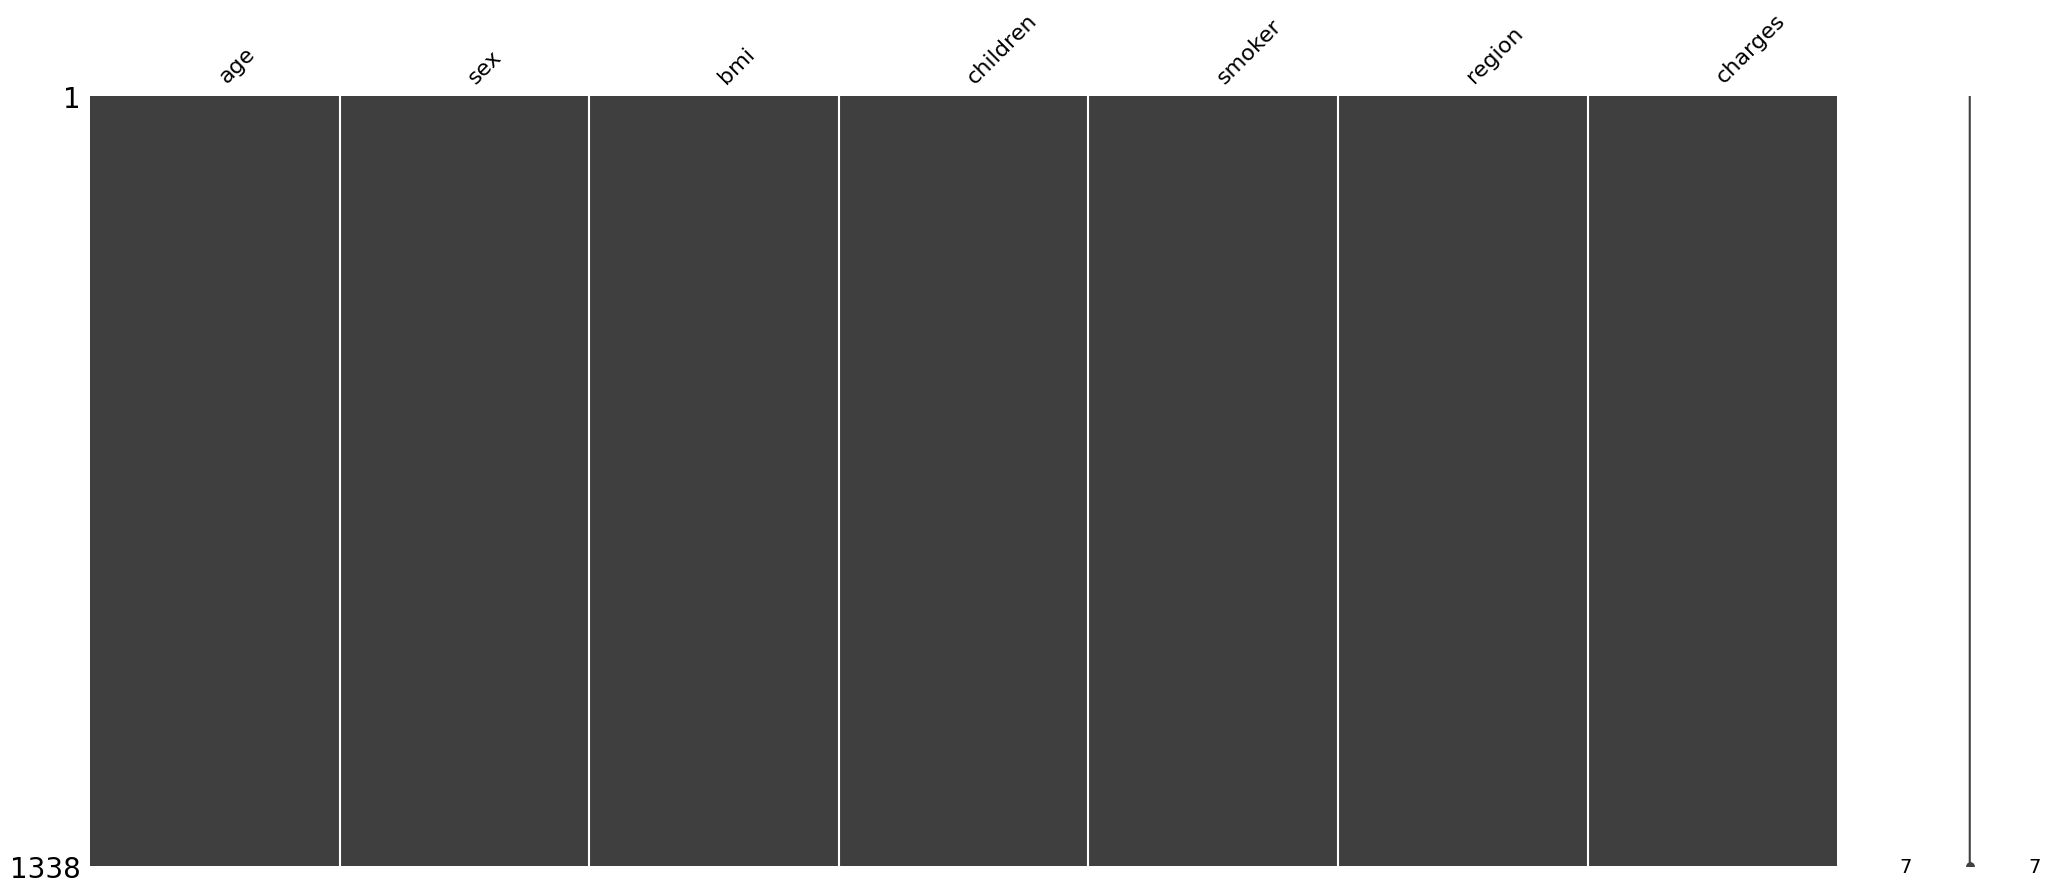

In [53]:
msno.matrix(df)

<AxesSubplot: >

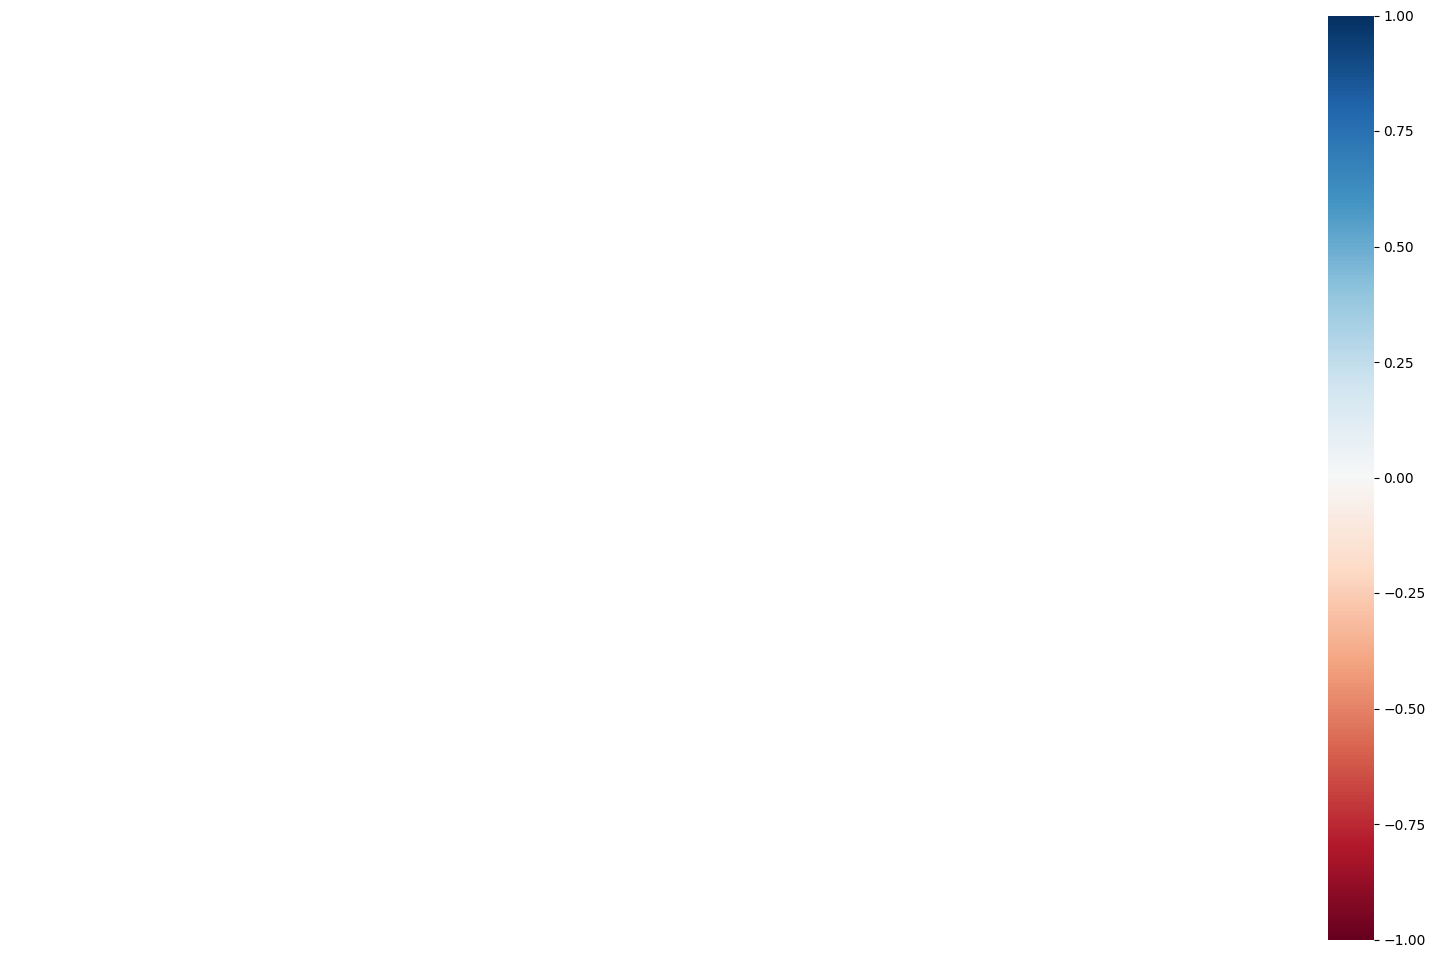

In [54]:
msno.heatmap(df)

### Séparer la data en deux partie : des variables continues et des variables catégoriales :

In [55]:
df_categorial=df.iloc[:,[1,3,4,5]]
df_continue=df.iloc[:,[0,2]]
target=df.iloc[:,6]


In [56]:
df_categorial

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [57]:
df_continue

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


### étude variable continue :

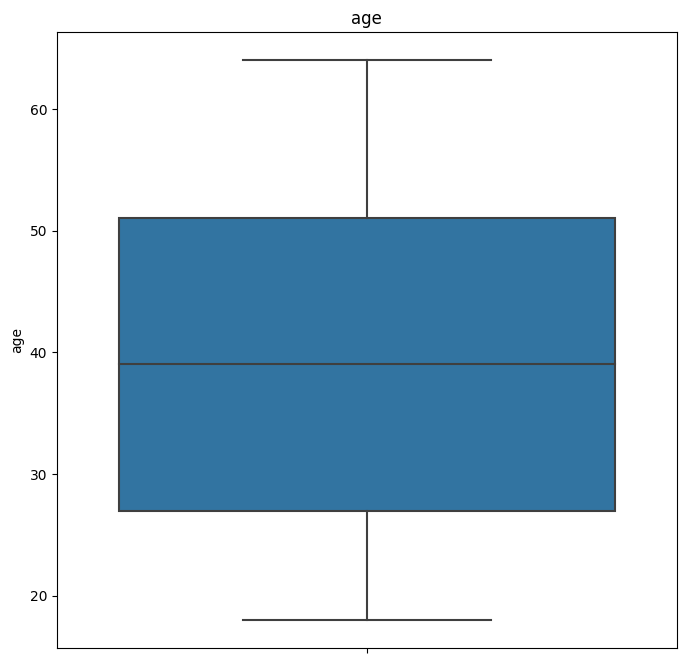

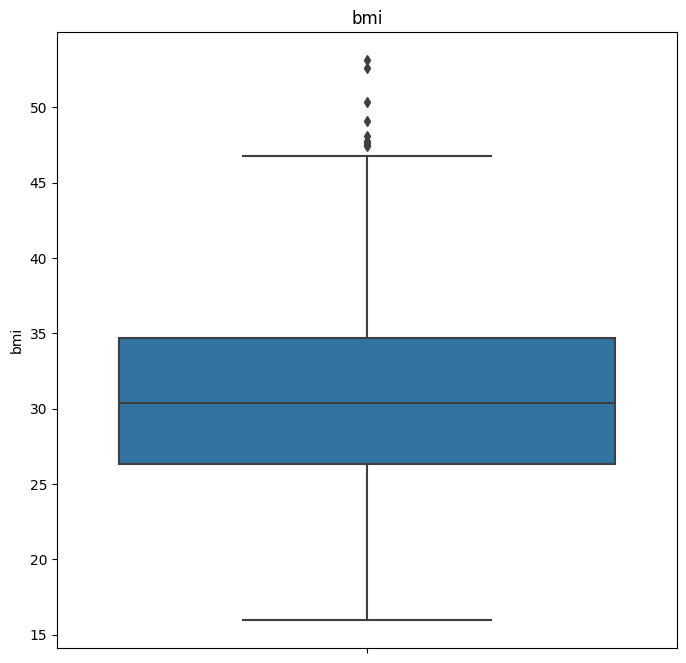

In [58]:
for col in df_continue.columns :
    plt.figure(figsize=(8,8))
    sns.boxplot(y=df_continue[col])
    plt.title(f"{col}")

On remarque qu'on des valeurs abirante dans les columns charges et bmi. 

In [59]:
# fig=plt.figure()
# for i, d in enumerate(df_continue): 
#     ax=fig.add_subplot(1,3,i+1)
#     ax.boxplot(d)
# plt.show()

Dans le cas des vaariable continue c'est toujours mieux savoir le type de distrebution des variables : 

<Figure size 800x800 with 0 Axes>

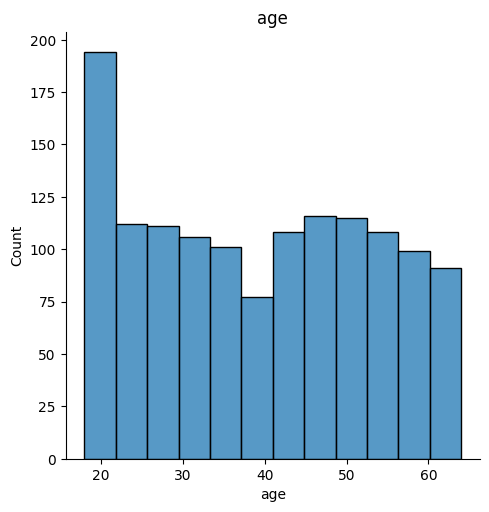

<Figure size 800x800 with 0 Axes>

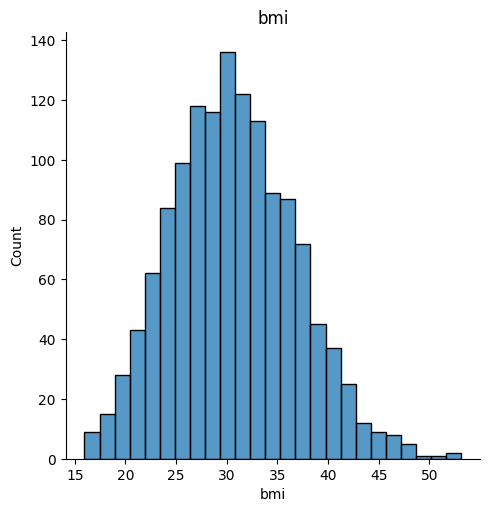

In [60]:
for col in df_continue.columns :
    plt.figure(figsize=(8,8))
    sns.displot(x=df_continue[col])
    # sns.kdeplot(x=df_continue[col])
    plt.title(f"{col}")

On remarque  qu'il y une ditrebution presque constante pour les ages sauf un pique pour les moins de 20 ans.<br>
On remarque aussi que bmi suite un loin normale. <br>
En fin les charges a une distrebution asymetrique, c'est à dire qu'on plus des gens avec des charges faibles moin de 1500. <br>

### étudier la correlation entre les variables continue : 

In [61]:
df_continue.corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


<Figure size 1200x1200 with 0 Axes>

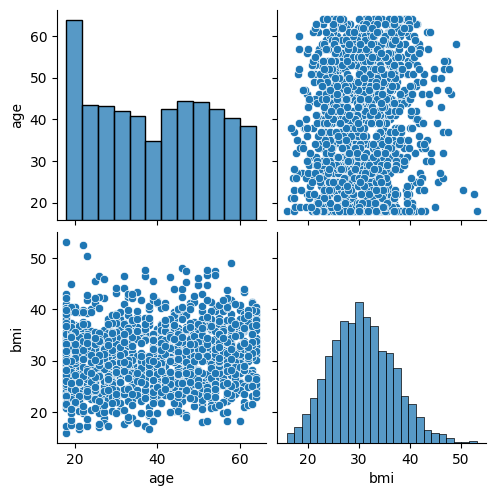

In [62]:
plt.figure(figsize=(12,12))

sns.pairplot(df_continue)

plt.show()

On remarque q'il y a pas une grand correlation entre les differents variavle continue, la valeur la plus élever c'est 0.29 .

### Etude de Target : 

Text(0.5, 1.0, 'Charges')

<Figure size 800x800 with 0 Axes>

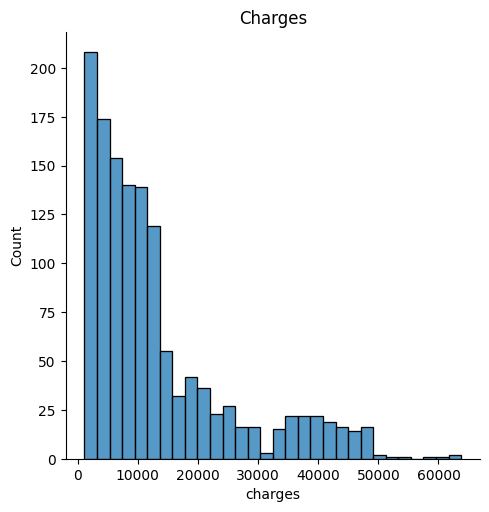

In [63]:
plt.figure(figsize=(8,8))
sns.displot(x=target)
# sns.kdeplot(x=df_continue[col])
plt.title(f"Charges")

### correlation entre le cible et les valeurs continues :

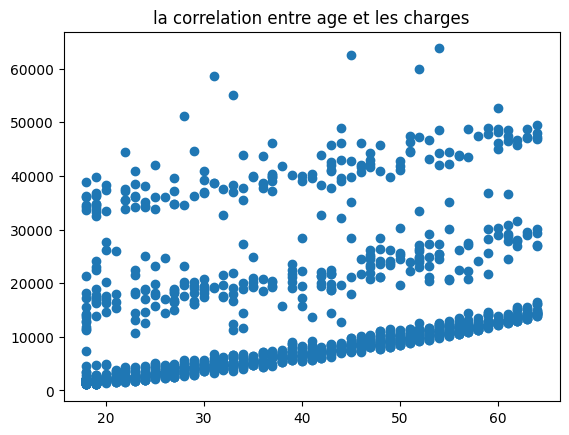

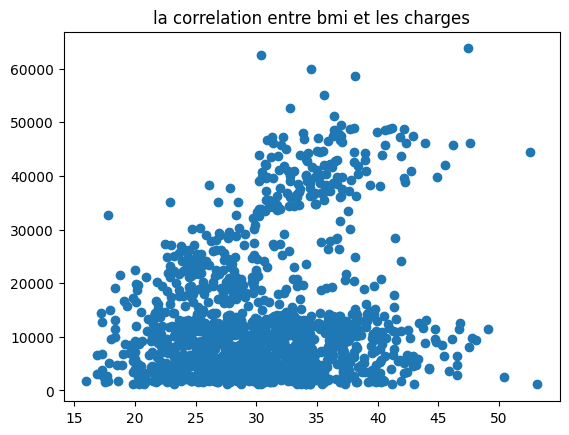

In [64]:
for col in df_continue.columns :
    plt.figure()
    plt.scatter(x=df_continue[col],y=target)
    plt.title(f"la correlation entre {col} et les charges")
    plt.show()

 d'après les valeurs les nuages de points on peut remarquer qu'il y a pas une grande correlation entre le cible et les valeur continue.

###  Etude des variable catégoriale :

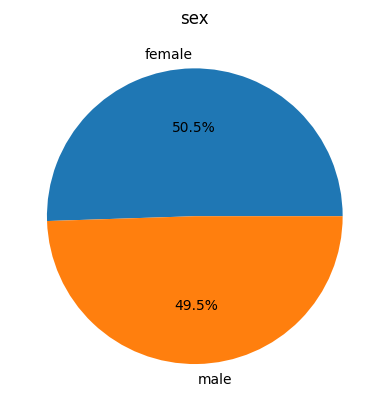

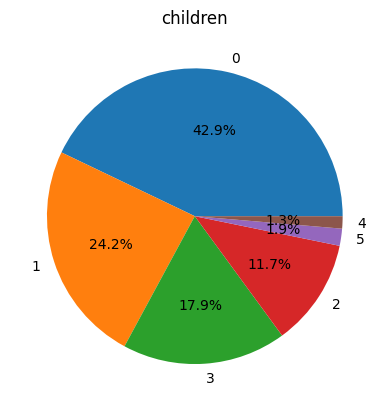

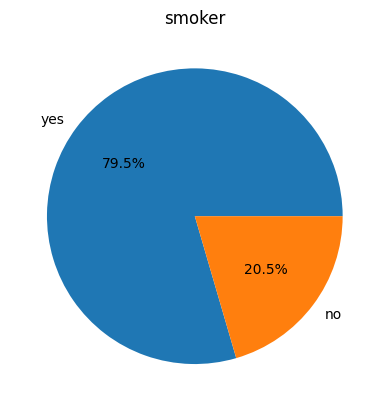

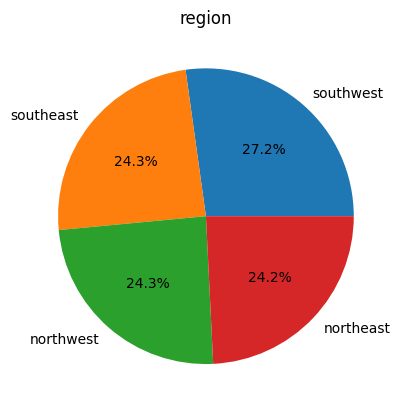

In [65]:
for col in df_categorial.columns :

    plt.figure()
    plt.pie(df_categorial[col].value_counts(), labels=df_categorial[col].unique(), autopct='%0.1f%%')
    plt.title(f"{col}")
    plt.show()

-on remarque le nombre des femmes et des hommes sont presque parails.<br>
- on remarque qu'il y a plus de 42% des couples qui ont pas d'enfant, après on trouves que plus de 24 % qui ont un seul enfant, mais ce qui different qu'on a plus des couples qui ont 3 enfant que 2. <br>
-on remarque aussi qu'on 75 % qui sont fumeur. <br>
-En fin on voit que les dsitrebution geographique est equitible avec un leger augmentation pour Southwest. 


### la correlation entre le cible et les valeur continue :

### Correlation entre variable  catégorialles :

In [66]:
for col1 in df_categorial.columns :
    for col2 in df_categorial.columns :
        if col1!=col2 :
            # Créer une table de contingence des deux variables
            #ct = pd.crosstab(df [col1], df[col2])
            #ct=pd.pivot_table(df [col1], df[col2])

            # Calculer le test du chi-deux sur la table de contingence
            #chi2, p, dof, expected = chi2_contingency(ct)
            corr, p = kendalltau(df [col1], df[col2])
            # Imprimer le p-value du test
            print(f"la valeur de chi2_contingency entre {col1} et {col2} est égale à {p}")

la valeur de chi2_contingency entre sex et children est égale à 0.5686800734851307
la valeur de chi2_contingency entre sex et smoker est égale à 0.0053412503298309955
la valeur de chi2_contingency entre sex et region est égale à 0.8660271638114508
la valeur de chi2_contingency entre children et sex est égale à 0.5686800734851307
la valeur de chi2_contingency entre children et smoker est égale à 0.5442679646171892
la valeur de chi2_contingency entre children et region est égale à 0.7046648148145226
la valeur de chi2_contingency entre smoker et sex est égale à 0.0053412503298309955
la valeur de chi2_contingency entre smoker et children est égale à 0.5442679646171892
la valeur de chi2_contingency entre smoker et region est égale à 0.9371994374093396
la valeur de chi2_contingency entre region et sex est égale à 0.8660271638114508
la valeur de chi2_contingency entre region et children est égale à 0.7046648148145226
la valeur de chi2_contingency entre region et smoker est égale à 0.937199437

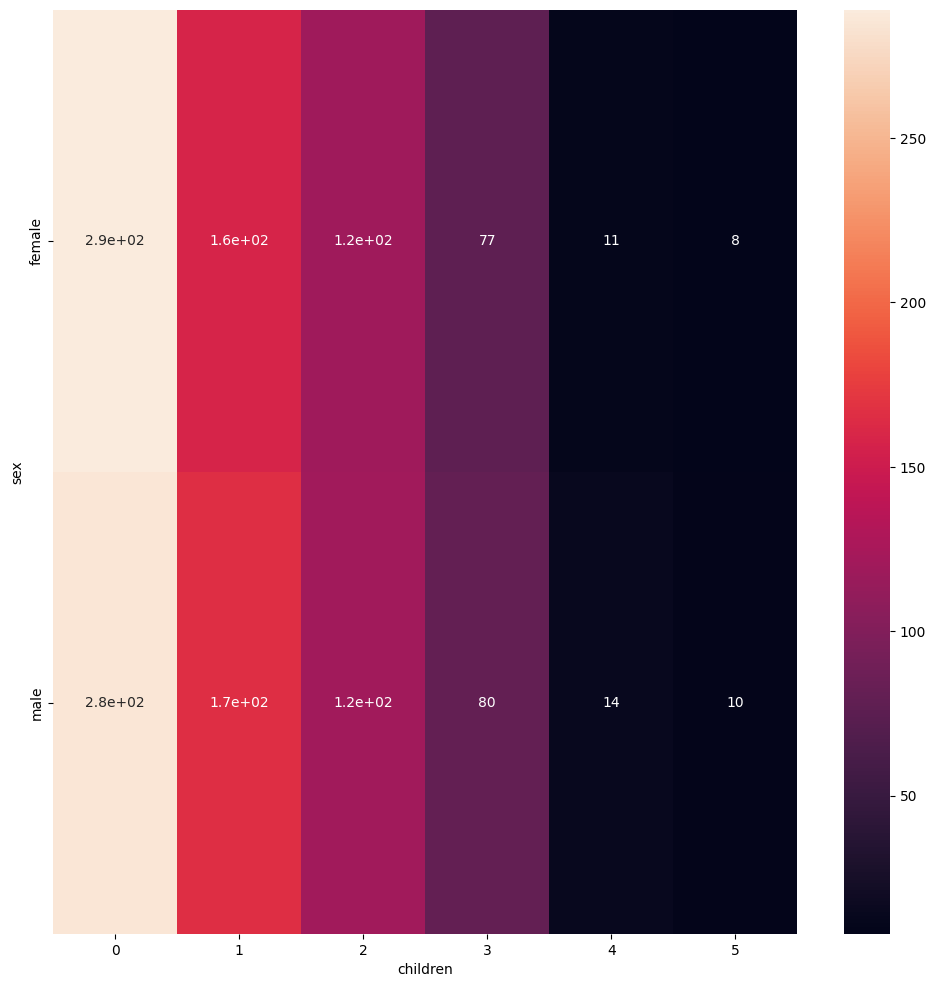

la valeur de chi2_contingency entre sex et children est égale à 0.9809803915285088
la valeur de chi2_contingency entre sex et children est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


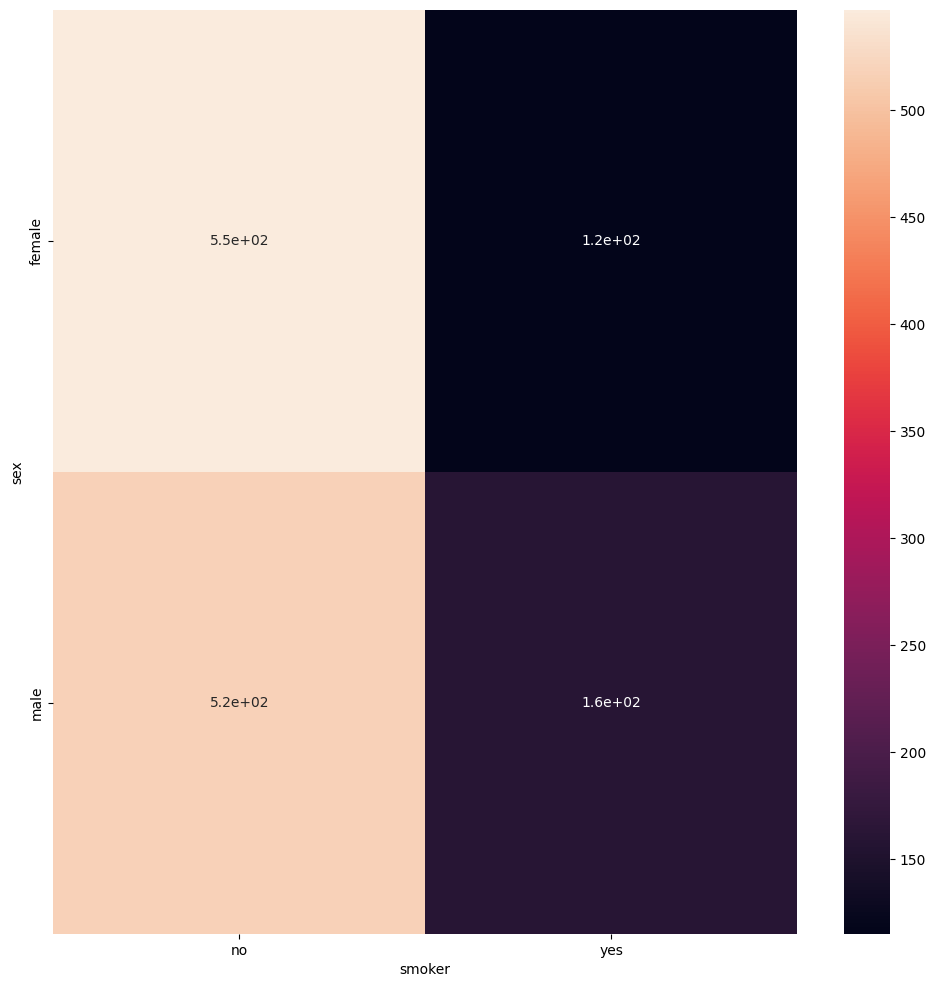

la valeur de chi2_contingency entre sex et smoker est égale à 0.006548143503580696
la valeur de chi2_contingency entre sex et smoker est inferieur à 0.05 cela signifie que les variables sont corrélées de manière significative.


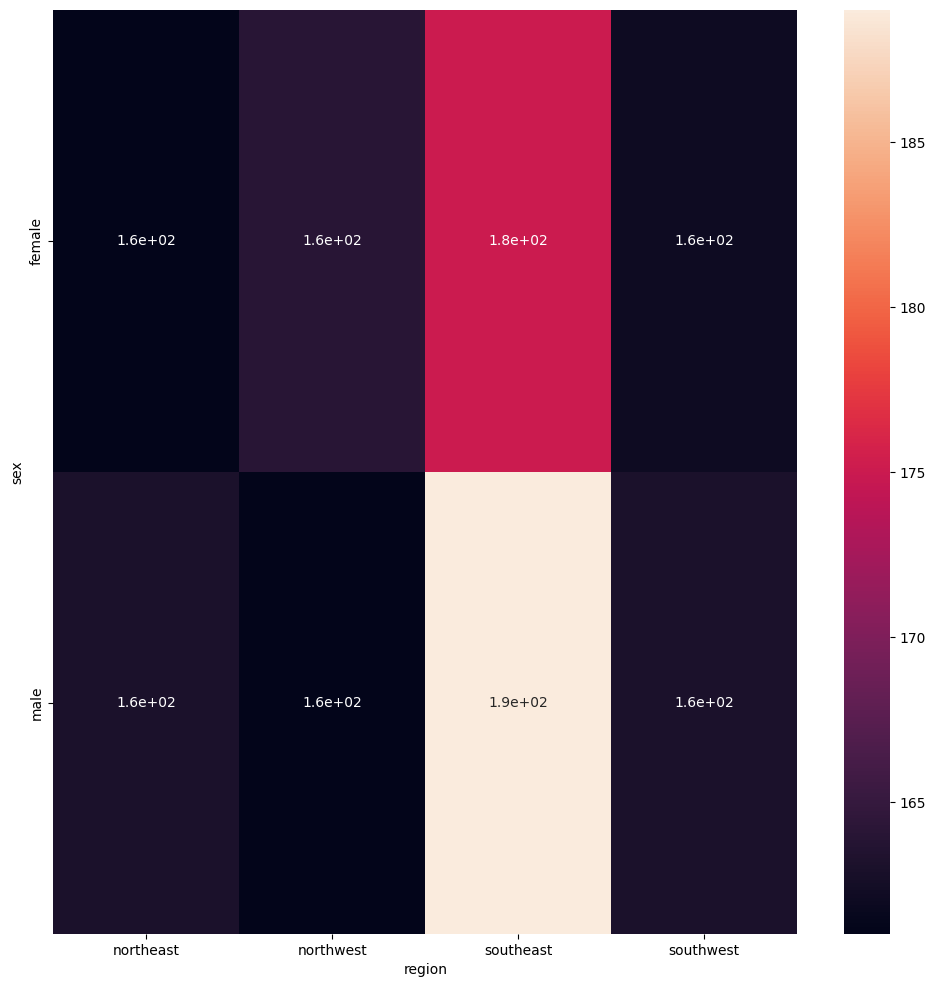

la valeur de chi2_contingency entre sex et region est égale à 0.9328921288772233
la valeur de chi2_contingency entre sex et region est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


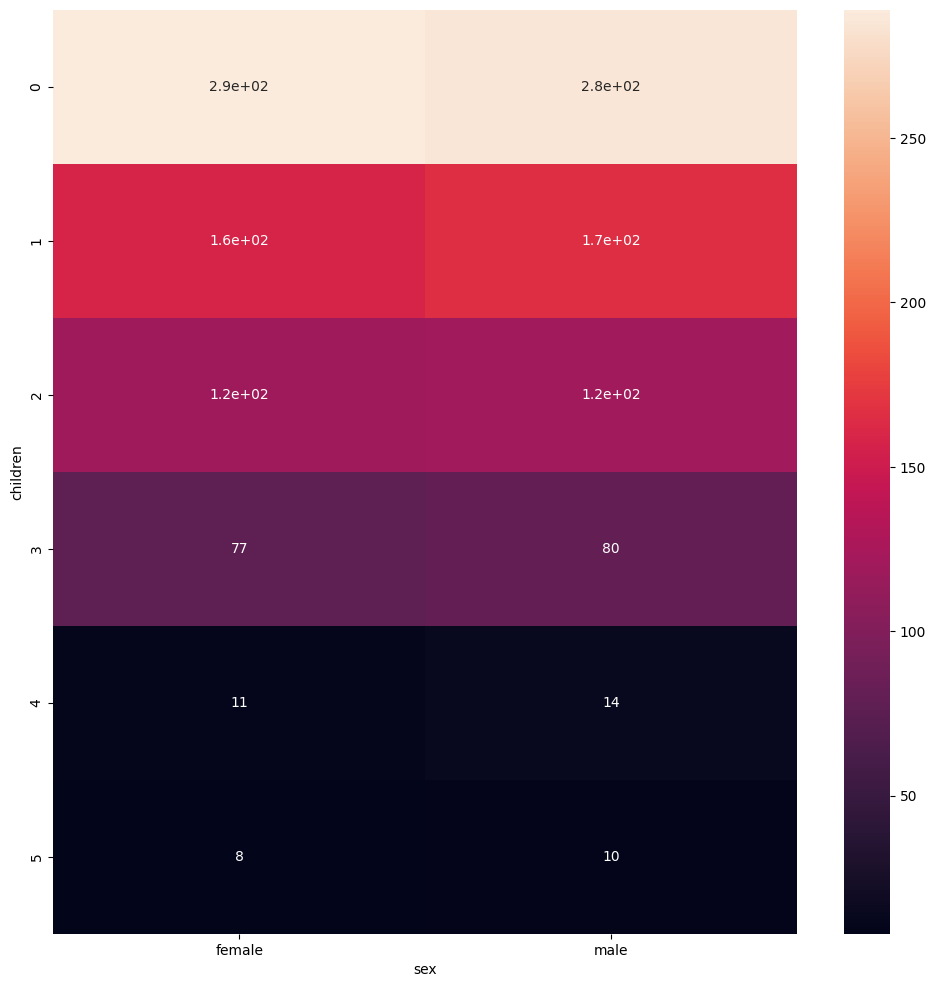

la valeur de chi2_contingency entre children et sex est égale à 0.9809803915285088
la valeur de chi2_contingency entre children et sex est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


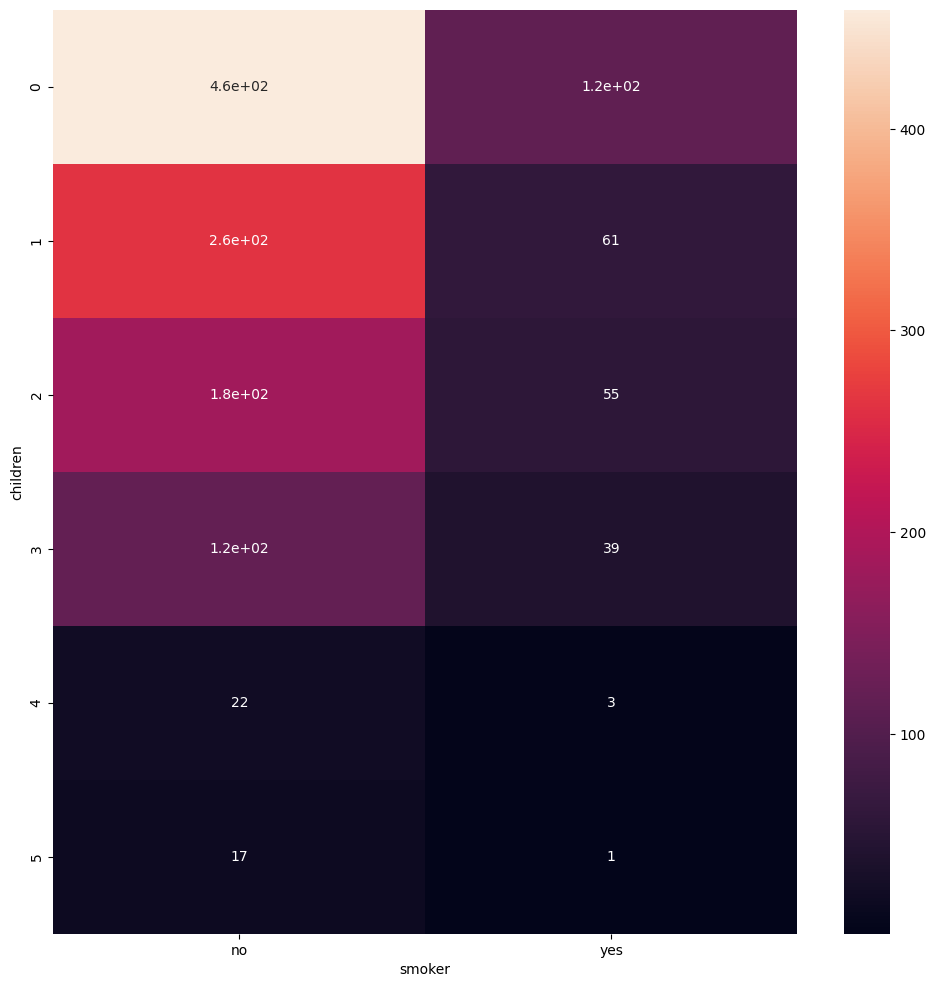

la valeur de chi2_contingency entre children et smoker est égale à 0.22912555089568779
la valeur de chi2_contingency entre children et smoker est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


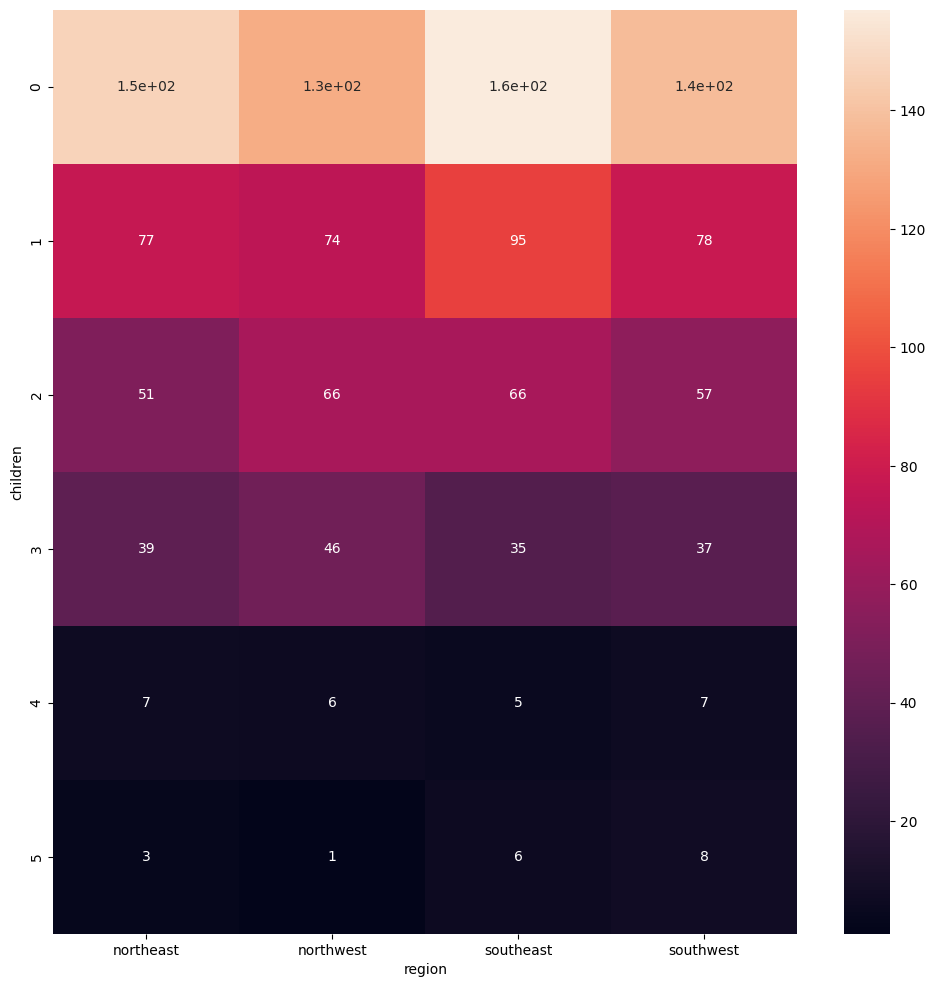

la valeur de chi2_contingency entre children et region est égale à 0.5428263602033943
la valeur de chi2_contingency entre children et region est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


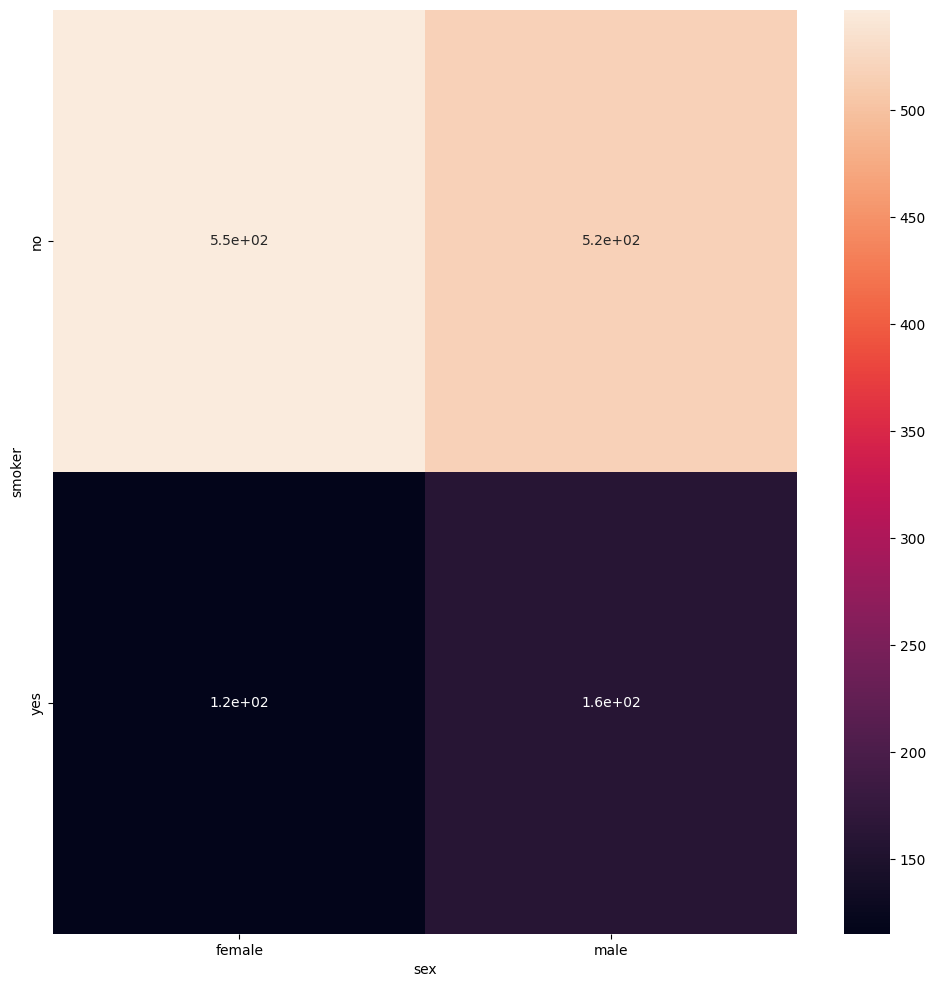

la valeur de chi2_contingency entre smoker et sex est égale à 0.006548143503580696
la valeur de chi2_contingency entre smoker et sex est inferieur à 0.05 cela signifie que les variables sont corrélées de manière significative.


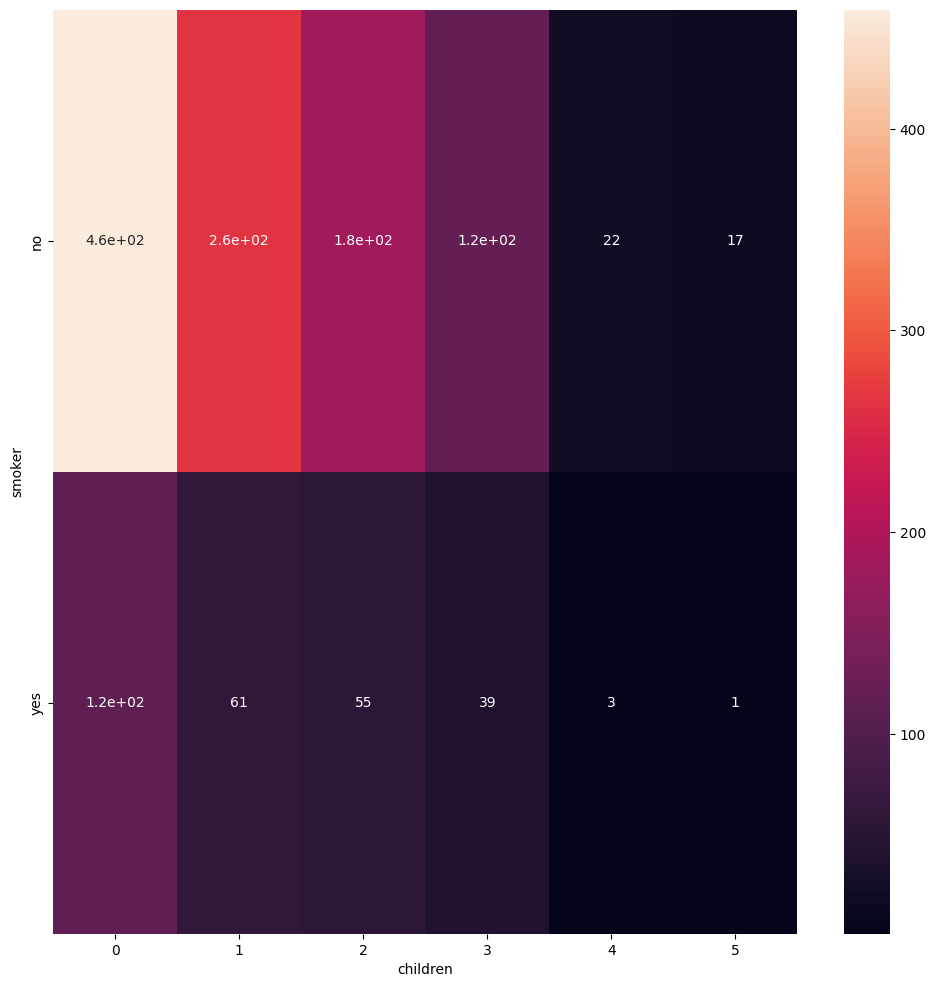

la valeur de chi2_contingency entre smoker et children est égale à 0.22912555089568779
la valeur de chi2_contingency entre smoker et children est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


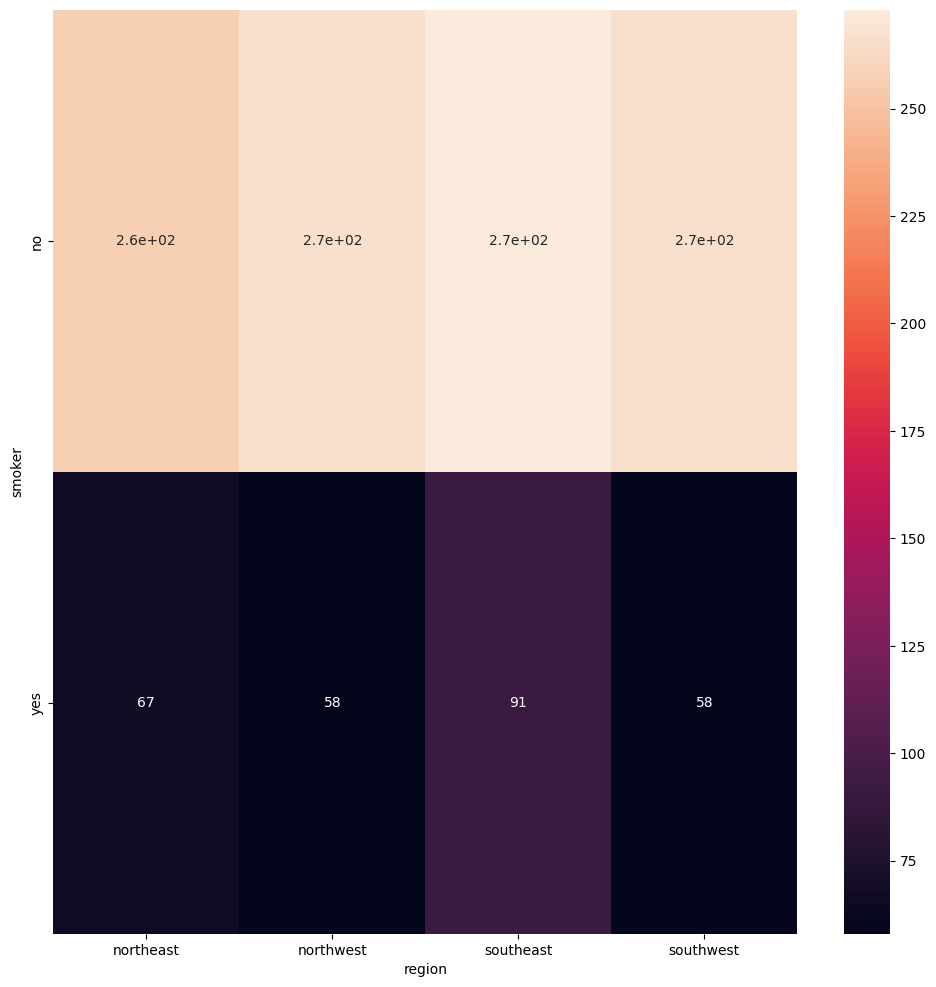

la valeur de chi2_contingency entre smoker et region est égale à 0.06171954839170547
la valeur de chi2_contingency entre smoker et region est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


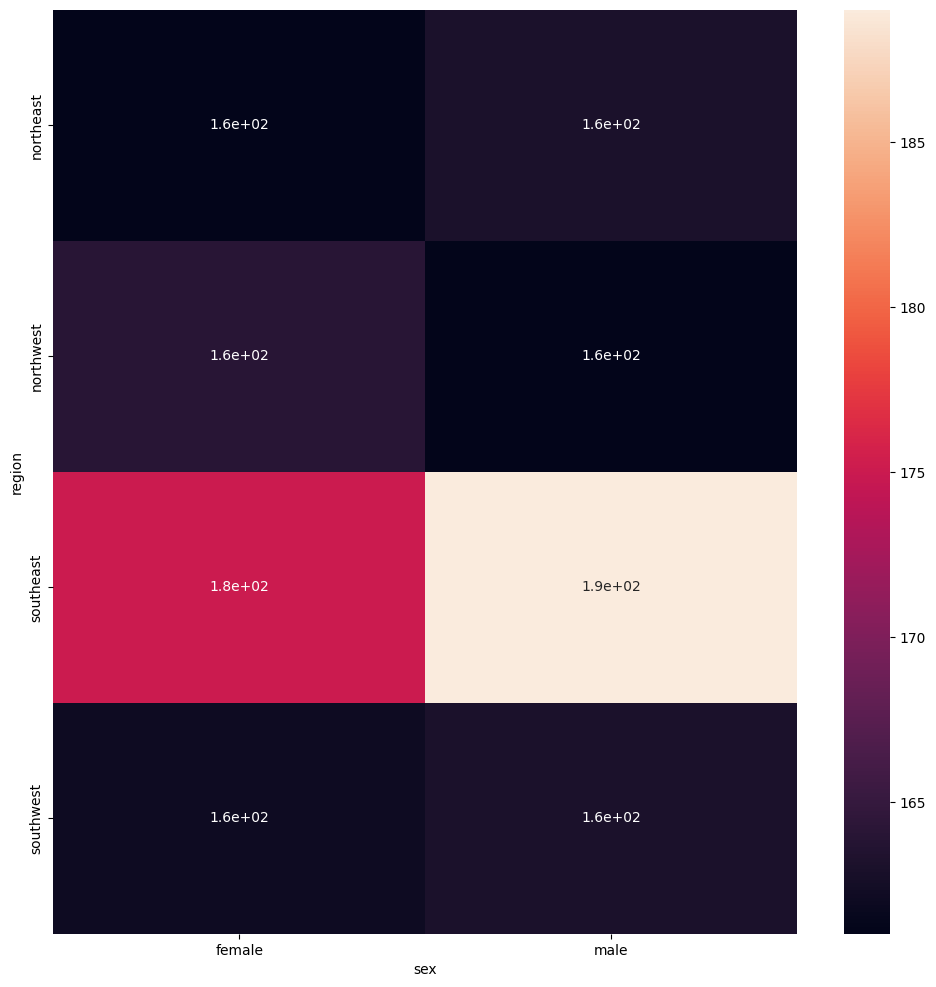

la valeur de chi2_contingency entre region et sex est égale à 0.9328921288772233
la valeur de chi2_contingency entre region et sex est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


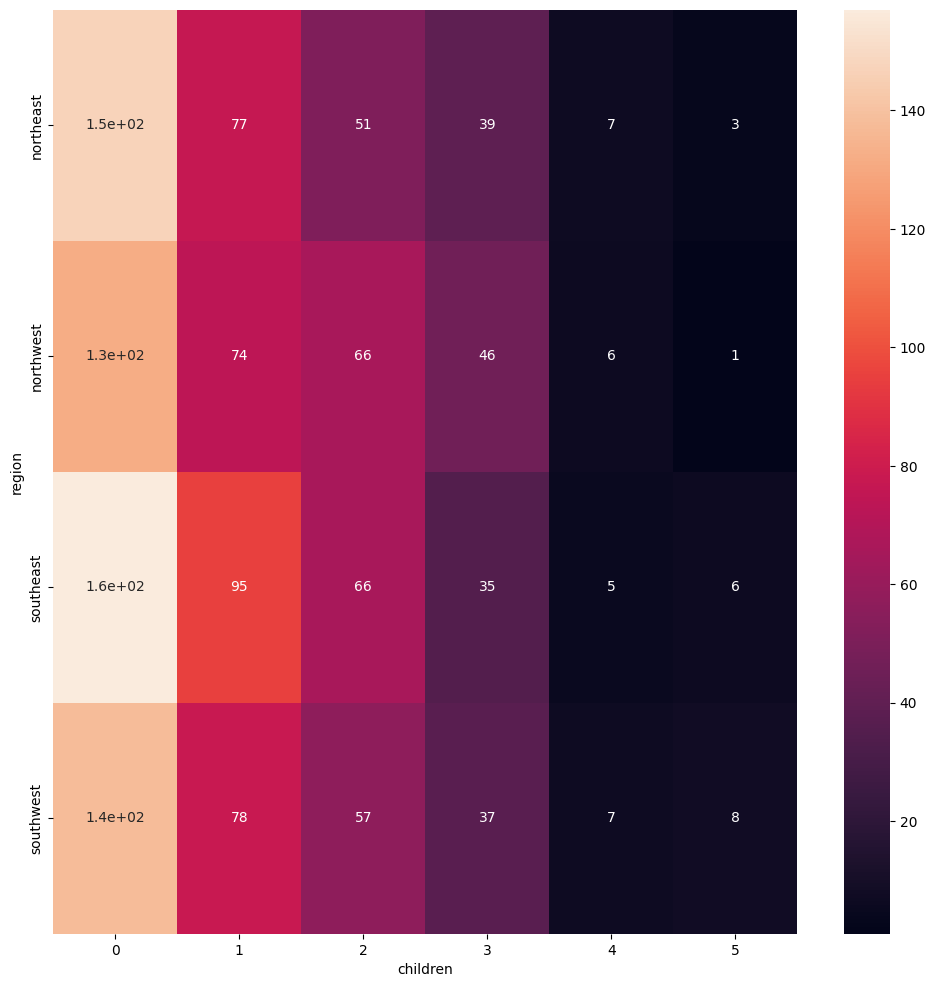

la valeur de chi2_contingency entre region et children est égale à 0.5428263602033943
la valeur de chi2_contingency entre region et children est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


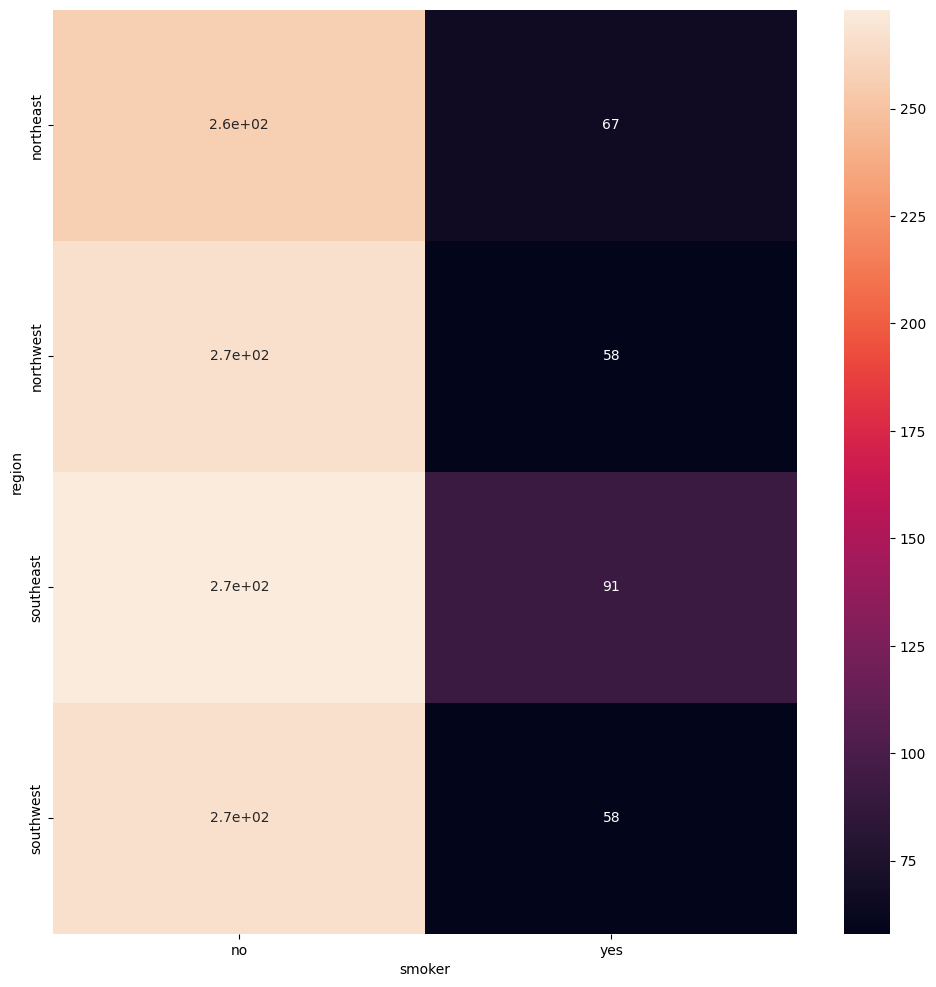

la valeur de chi2_contingency entre region et smoker est égale à 0.06171954839170541
la valeur de chi2_contingency entre region et smoker est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.


In [67]:
for col1 in df_categorial.columns :
    for col2 in df_categorial.columns :
        if col1!=col2 :
            # Créer une table de contingence des deux variables
            ct = pd.crosstab(df [col1], df[col2])
            # Calculer le test du chi-deux sur la table de contingence
            plt.figure(figsize=(12,12))
            sns.heatmap(ct,annot=True)
            plt.show()
            chi2, p, dof, expected = chi2_contingency(ct)
            # Imprimer le p-value du test
            print(f"la valeur de chi2_contingency entre {col1} et {col2} est égale à {p}")
            if p<0.05 :
                print(f"la valeur de chi2_contingency entre {col1} et {col2} est inferieur à 0.05 cela signifie que les variables sont corrélées de manière significative.")
            else :
                print(f"la valeur de chi2_contingency entre {col1} et {col2} est superieur à 0.05 cela signifie que les variables ne sont pas corrélées de manière significative.")

### Correlation entre valeur la cible et les valeurs quanlitative 

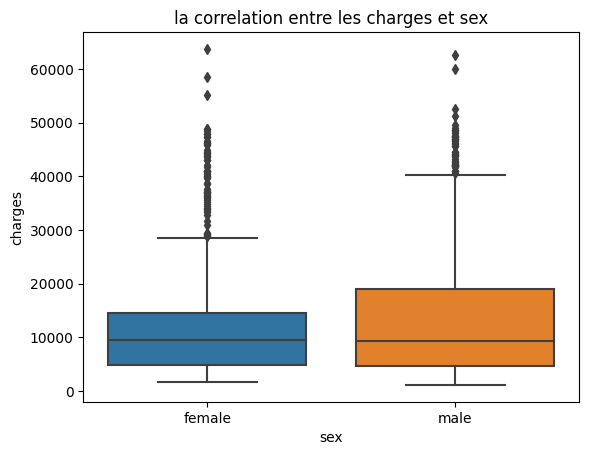

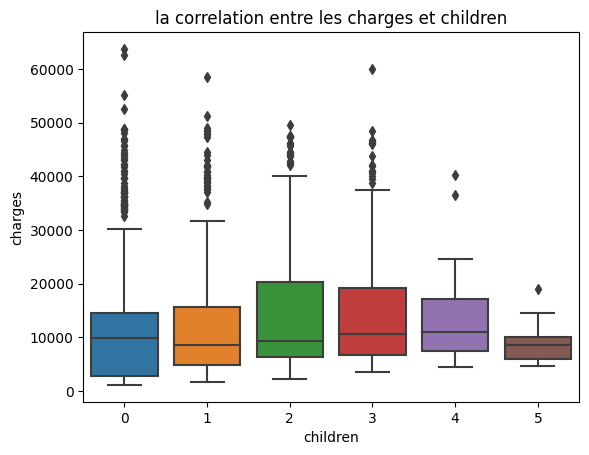

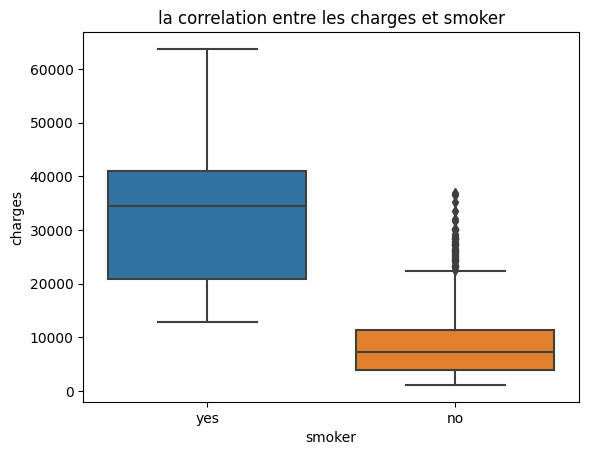

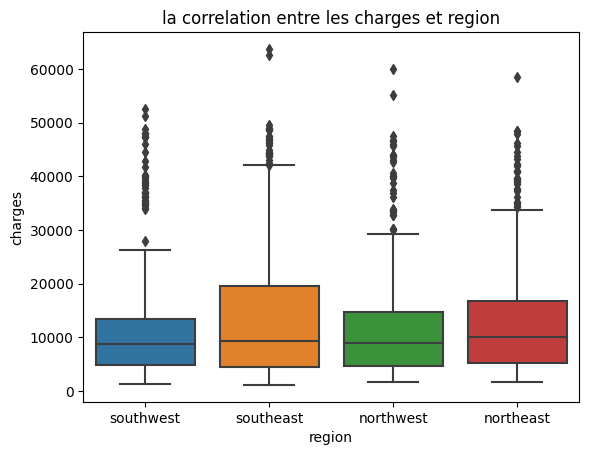

In [68]:
for col in df_categorial.columns :
    plt.figure()
    sns.boxplot(x=df_categorial[col],y=target)
    plt.title(f"la correlation entre les charges et {col}")
    plt.show()

- On peut remarquer qu'il y a une independance entre  les charges et les smoker , on voit que le mediane des charges pour les gens qui fument ont plus des charges
qui fument pas . <br>
pour les autres la dependance est c'est pas claire donc on dois faire une test statistique pour verefier l'independance. 

Il existe plusieurs tests statistiques que vous pouvez utiliser pour savoir si une relation de corrélation existe entre une variable quantitative et une variable qualitative dans un jeu de données. Quelques exemples de tests couramment utilisés dans ce contexte sont :<br>

Test de Student : le test de Student mesure la corrélation entre deux variables en comparant la moyenne de la variable quantitative entre les groupes de la variable qualitative. Le test de Student est souvent utilisé pour comparer la moyenne d'une variable quantitative entre deux groupes.<br>

Test de Mann-Whitney : le test de Mann-Whitney mesure la corrélation entre deux variables en comparant la distribution des valeurs de la variable quantitative entre les groupes de la variable qualitative. Le test de Mann-Whitney est souvent utilisé lorsque les données ne suivent pas une distribution normale.<br>

Test de Kruskal-Wallis : le test de Kruskal-Wallis mesure la corrélation entre deux variables en comparant la distribution des valeurs de la variable quantitative entre plusieurs groupes de la variable qualitative. Le test de Kruskal-Wallis est souvent utilisé lorsque vous voulez comparer la distribution d'une variable quantitative entre plus de deux groupes.<br>

Test du chi-deux : le test du chi-deux mesure la corrélation entre deux variables en comparant les fréquences observées et attendues de chaque combinaison de modalités de la variable qualitative et de la variable quantitative. Le test du chi-deux est souvent utilisé lorsque vous voulez savoir si une relation de corrélation existe entre deux variables catégorielles.<br>

Le test d'ANOVA (Analysis of Variance) mesure la différence de moyennes entre plusieurs groupes d'une variable quantitative. Il est donc utilisé pour comparer la moyenne d'une variable quantitative entre plus de deux groupes de la variable qualitative.<br>

Le test d'ANOVA est similaire au test de Student, qui mesure la différence de moyennes entre deux groupes d'une variable quantitative. Cependant, le test d'ANOVA est généralement utilisé lorsque vous voulez comparer la moyenne d'une variable quantitative entre plus de deux groupes, tandis que le test de Student est généralement utilisé pour comparer la moyenne entre deux groupes seulement.<br>

Le test d'ANOVA est donc un test statistique qui peut être utilisé pour mesurer la corrélation entre une variable quantitative et une variable qualitative dans certaines situations, mais il n'est pas généralement considéré comme l'un des tests les plus couramment utilisés pour mesurer la corrélation entre une variable quantitative et une variable qualitative.<br>

In [69]:
df_categorial.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

##### Correlation entre charges et children avec le test kruskal :

In [70]:

# Sélectionner les valeurs de la colonne dans chaque groupe
group1 = df[df['children'] == 0]['charges']
group2 = df[df['children'] == 1]['charges']
group3 = df[df['children'] == 2]['charges']
group4 = df[df['children'] == 3]['charges']
group5 = df[df['children'] == 4]['charges']
group6 = df[df['children'] == 5]['charges']
# Appliquer le test de Kruskal-Wallis
stat, p_value = kruskal(group1, group2, group3,group4, group5, group6)

# Afficher le résultat
print("Test-statistique H :", stat)
print("p-value :", p_value)

Test-statistique H : 29.487065628030848
p-value : 1.8604847983610864e-05


##### Correlation entre charges et region avec le test kruskal :

In [71]:

# Sélectionner les valeurs de la colonne dans chaque groupe
group1 = df[df['region'] == 'southwest']['charges']
group2 = df[df['region'] == 'southeast']['charges']
group3 = df[df['region'] == 'northwest']['charges']
group4 = df[df['region'] == 'northeast']['charges']
# Appliquer le test de Kruskal-Wallis
stat, p_value = kruskal(group1, group2, group3,group4)
# Afficher le résultat
print("Test-statistique H :", stat)
print("p-value :", p_value)

Test-statistique H : 4.734181215658743
p-value : 0.19232908072121002


##### Correlation entre charges et smoker avec le test mannwhitneyu :

In [72]:
# Sélectionner les valeurs de la colonne dans chaque groupe
group1 = df[df['smoker'] == 'yes']['charges']
group2 = df[df['smoker'] == 'no']['charges']

# Appliquer le test de Mann-Whitney
stat, p_value = mannwhitneyu(group1, group2)

# Afficher le résultat
print("Test-statistique U :", stat)
print("p-value :", p_value)

Test-statistique U : 284133.0
p-value : 5.270233444503571e-130


##### Correlation entre charges et smoker avec le test kruskal :

In [73]:
# Sélectionner les valeurs de la colonne dans chaque groupe
group1 = df[df['smoker'] == 'yes']['charges']
group2 = df[df['smoker'] == 'no']['charges']

# Appliquer le test de Mann-Whitney
stat, p_value = kruskal(group1, group2)

# Afficher le résultat
print("Test-statistique U :", stat)
print("p-value :", p_value)

Test-statistique U : 588.5196583657973
p-value : 5.259018267498522e-130


### Modélisation 

### codage 

In [74]:
df.drop(['charges','region'],axis=1,inplace=True)

In [75]:
df["children"]=df["children"].replace({0:"zero_one",1:'zero_one',2:'two_three',3:'two_three',4:'Four_five',5:'Four_five'})
df["children"]


0        zero_one
1        zero_one
2       two_three
3        zero_one
4        zero_one
          ...    
1333    two_three
1334     zero_one
1335     zero_one
1336     zero_one
1337     zero_one
Name: children, Length: 1338, dtype: object

In [76]:




# Créez 3 classes en utilisant pd.cut()
df['bmi'] = pd.cut(df['bmi'], bins=[0, 25, 30, 35], labels=['normal', 'overweight', 'obese'])

# Affichez le résultat
print(df)

      age     sex         bmi   children smoker
0      19  female  overweight   zero_one    yes
1      18    male       obese   zero_one     no
2      28    male       obese  two_three     no
3      33    male      normal   zero_one     no
4      32    male  overweight   zero_one     no
...   ...     ...         ...        ...    ...
1333   50    male       obese  two_three     no
1334   18  female       obese   zero_one     no
1335   18  female         NaN   zero_one     no
1336   21  female  overweight   zero_one     no
1337   61  female  overweight   zero_one    yes

[1338 rows x 5 columns]


<AxesSubplot: xlabel='bmi', ylabel='charges'>

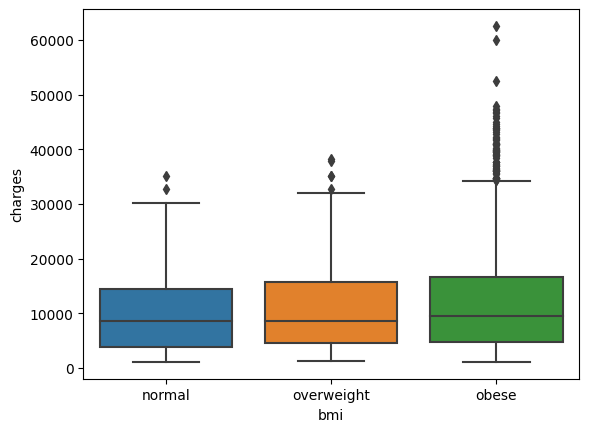

In [77]:
sns.boxplot(x=df.bmi,y=target)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2,random_state=42)

In [79]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)


In [80]:
X_test

,age,sex_female,sex_male,bmi_normal,bmi_overweight,bmi_obese,children_Four_five,children_two_three,children_zero_one,smoker_no,smoker_yes
764,45,1,0,0,1,0,0,1,0,1,0
887,36,1,0,0,0,1,0,0,1,1,0
890,64,1,0,0,1,0,0,0,1,0,1
1293,46,0,1,0,1,0,0,1,0,1,0
259,19,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
109,63,0,1,0,0,0,0,0,1,0,1
575,58,1,0,0,1,0,0,0,1,1,0
535,38,0,1,0,1,0,0,0,1,1,0
543,54,1,0,0,0,0,0,0,1,0,1


In [81]:
# encoder = OrdinalEncoder()
# df_categorial.iloc[:,[0,2,3]]=encoder.fit_transform(df_categorial.iloc[:,[0,2,3]])

In [82]:
#df=pd.concat([df_categorial,df_continue],axis=1)
df

,age,sex,bmi,children,smoker
0,19,female,overweight,zero_one,yes
1,18,male,obese,zero_one,no
2,28,male,obese,two_three,no
3,33,male,normal,zero_one,no
4,32,male,overweight,zero_one,no
...,...,...,...,...,...
1333,50,male,obese,two_three,no
1334,18,female,obese,zero_one,no
1335,18,female,NaN,zero_one,no
1336,21,female,overweight,zero_one,no


### Normalisation 

In [83]:
target = pd.concat([y_train,y_test],axis=0)
target

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 1338, dtype: float64

In [84]:
# minMaxScaler=RobustScaler()
# X_train=pd.DataFrame(minMaxScaler.fit_transform(X_train),columns=df.columns)
# X_train
# X_test=pd.DataFrame(minMaxScaler.transform(X_test),columns=df.columns)
# X_test

In [85]:
# standarscaler=StandardScaler()
# X_train=pd.DataFrame(standarscaler.fit_transform(X_train),columns=df.columns)
# X_train
# X_test=pd.DataFrame(standarscaler.transform(X_test),columns=df.columns)
# X_test

In [86]:

cols_to_norm = [ 'age']
preprocessor = ColumnTransformer(
    [('scaler',  RobustScaler() , cols_to_norm)],

    remainder='passthrough'
)

pipeline = Pipeline([
    ('normalizer', preprocessor),
    # autres étapes de votre pipeline ici
])
# Transformation des données
X_train = pipeline.fit_transform(X_train)
X_train
X_test = pipeline.transform(X_test)
X_test

array([[ 0.22916667,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.14583333,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.02083333,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.0625    ,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.60416667,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.47916667,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [87]:
X_train

array([[ 0.27083333,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.3125    ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.52083333,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.77083333,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.10416667,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.64583333,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ]])

In [88]:
# df_encod = np.concatenate([df_categorial_hote,df_cont_norm],axis=1)
# df_encod

In [89]:
# X_train, X_test, y_train, y_test = train_test_split(df_norm, target, test_size=0.2,shuffle=True,random_state=42)

In [90]:
# df_norm = np.concatenate([X_train,X_test],axis=0)
# df_norm

In [91]:
x_train, x_test, Y_train, Y_test = train_test_split(df, target, test_size=0.2,random_state=42)

## 6. Modelling mise en place du model : 
### 6.1 XGBoost : 

- Sans modifier les hypers parametres :

In [92]:
model = make_pipeline(
    PolynomialFeatures(degree=2), xgb.XGBRegressor(learning_rate= 0.08,max_depth=2)
)
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Calculer le coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)
print("R2: %.4f" % r2)

R2: 0.8748


In [93]:
    # Définissez les paramètres de PolynomialFeatures et XGBoost que vous voulez optimiser
    aedss;
for i in range(2,15):
        param_grid = {
        'polynomialfeatures__degree': [ 2,3,4,5,6,7],
        # 'PCA__n_components': [ 2,3,4,5,6,7],

        'xgbregressor__learning_rate': np.linspace(0.06,0.1,100),
        'xgbregressor__max_depth': [2,3,4,5],
        'xgbregressor__n_estimators': [100,110,120,130,140,150,160,170,180],
        # 'xgbregressor__reg_alpha':[0.5,0.6,0.7,0.8],
        # 'xgbregressor__reg_lambda':[0.5,0.6,0.7,0.8],
        }

        # Créez votre pipeline
        pipeline = Pipeline([
         ('polynomialfeatures', PolynomialFeatures()),
        # ('PCA', PCA()),

        ('xgbregressor', xgb.XGBRegressor())
        ])

        # Créez votre objet RandomizedSearchCV avec KFold comme validateur croisé
        random_search = RandomizedSearchCV(pipeline, param_grid,n_iter=50, cv=KFold(n_splits=i))

        # Entraînez le modèle en utilisant les données d'entraînement
        random_search.fit(X_train, y_train)

        # Affichez les meilleurs paramètres
        print(random_search.best_params_)

        # Affichez la performance du modèle sur les données de test
        print("score train : {} ",random_search.score(X_train,y_train))
        print("score test : {}",random_search.score(X_test,y_test))


NameError: name 'aedss' is not defined

In [ ]:

for i in range(2,15):
        # Définir les paramètres à tester
        param_distributions = {
            'alpha': np.linspace(0.9,80,100),
            'max_iter': [25,50,75,100,200,300,400,500,900],
            'tol': [1e-3, 1e-4, 1e-5],
            
        }

        # Créer un objet Lasso
        lasso = Lasso()

        # Créer un objet KFold
        kfold = KFold(n_splits=i)

        # Créer un objet RandomizedSearchCV
        random_search = GridSearchCV(lasso, param_distributions, cv=kfold)

        # Entraîner le modèle sur l'ensemble de données
        random_search.fit(X_train, y_train)

        # Imprimer les meilleurs paramètres
        print("Meilleurs paramètres:", random_search.best_params_)
        print("Meilleurs score : %.4f" % random_search.best_score_)
        print("score train : {}",random_search.score(X_train,y_train))
        print("score test : {}",random_search.score(X_test,y_test)) 

Meilleurs paramètres: {'alpha': 3.2969696969696964, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7362
score train : {} 0.7417230853445964
score test : {} 0.7834078831436196
Meilleurs paramètres: {'alpha': 58.42727272727272, 'max_iter': 25, 'tol': 1e-05}
Meilleurs score : 0.7356
score train : {} 0.7411825152335707
score test : {} 0.7809680676340754


KeyboardInterrupt: 

In [ ]:
# Sélectionnez les colonnes à normaliser
cols_to_normalize = ['age', 'bmi']

# Créez un objet PowerTransformer
pt = PowerTransformer()

# Créez un objet ColumnTransformer pour sélectionner les colonnes à transformer
ct = ColumnTransformer([("pt", pt, cols_to_normalize)])

# Créez une pipeline qui applique d'abord ColumnTransformer, puis xgboost
pipeline = Pipeline([("ct", ct), ("xgb", xgb.XGBRegressor())])

# Créez les paramètres que vous souhaitez tester avec grid search
parameters = {'xgb__n_estimators': [100, 250, 500],
              'xgb__learning_rate': [0.01, 0.05,0.08,0.09, 0.1],
        }

# Créez un objet GridSearchCV en spécifiant la pipeline, les paramètres et la méthode de validation (ici, KFold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(pipeline, parameters, cv=kfold, scoring='r2')

# Entraînez le modèle en utilisant les données d'entraînement
clf.fit(X_train, y_train)

# Imprimez les meilleurs hyperparamètres et le score obtenu
print(clf.best_params_)
print(clf.best_score_)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# Faites des prédictions sur les données de test
y_pred = clf.predict(X_test)

# Calculez et imprimez le score RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/utils/__init__.py", line 424, in _get_column_indices
    all_columns = X.columns
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 723, in fit_transform
    self._validate_column_callables(X)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 425, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/home/ha-brek/miniconda3/envs/env_Data_Analyst/lib/python3.10/site-packages/sklearn/utils/__init__.py", line 426, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


In [ ]:

# Define the pipeline with PowerTransformer and XGBoost
for i in range(2,15):
    cols_to_normalize = ['age', 'bmi']
    model = Pipeline([
        ('power_transform', PowerTransformer()),
        ('xgb', xgb.XGBRegressor()),
        ('scaler', ColumnTransformer([
        ('normalize', StandardScaler(), cols_to_normalize)
    ])),
    ])

    # Define the grid search parameters
    param_grid = {
        'power_transform__method': ['yeo-johnson', 'box-cox'],
        'xgb__learning_rate': [0.1, 0.5, 1],
        'xgb__max_depth': [3, 5, 7]
    }

    # Define the grid search
    grid_search = GridSearchCV(model, param_grid, cv=KFold (i))

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(best_params)
    print("score train : {} ",grid_search.score(X_train,y_train))
    print("score test : {}",grid_search.score(X_test,y_test))

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('power_transform', PowerTransformer()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_con...
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...)),
                ('scaler',
                 ColumnTransformer(transformers=[('normalize', StandardScaler(),
                                                  ['age', 'bmi'])]))]) does not.

In [ ]:

# Define the pipeline with PowerTransformer and XGBoost
for i in range(2,15):
    model = Pipeline([
        ('power_transform', PowerTransformer()),
        ('xgb', xgb.XGBRegressor())
    ])

    # Define the grid search parameters
    param_grid = {
        'power_transform__method': ['yeo-johnson', 'box-cox'],
        'xgb__learning_rate': [0.1, 0.5, 1],
        'xgb__max_depth': [3, 5, 7]
    }

    # Define the grid search
    grid_search = GridSearchCV(model, param_grid, cv=KFold (i))

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(best_params)
    print("score train : {} ",grid_search.score(X_train,y_train))
    print("score test : {}",grid_search.score(X_test,y_test))


{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__method': 'yeo-johnson', 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}
score train : {}  0.8924567309654489
score test : {} 0.8774583709624256
{'power_transform__met

KeyboardInterrupt: 

In [ ]:
# Créer un objet XGBRegressor
xgb_reg = xgb.XGBRegressor(learning_rate= 0.05,max_depth=2,n_estimators=150)

# Entraîner le modèle sur l'ensemble d'entraînement
xgb_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = xgb_reg.predict(X_test)
# Calculer le coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)
print("R2: %.4f" % r2)

R2: 0.8785


In [ ]:
  
for i in range(2,15):
    # Définissez les paramètres à tester dans GridSearchCV
    grid_params = {
        'polynomialfeatures__degree': [2],
        'randomforestregressor__n_estimators': [10, 50, 100,120,150],
        'randomforestregressor__max_depth': [2, 3, 5],
    }

    # Créez le pipeline
    pipeline = Pipeline([
        ('polynomialfeatures', PolynomialFeatures()),
        ('randomforestregressor', RandomForestRegressor())
    ])
    kf=KFold(n_splits=i,random_state=42,shuffle=True)
    # Créez l'objet GridSearchCV
    grid_search = GridSearchCV(pipeline, grid_params, cv=kf)

    # Entraînez le modèle en utilisant les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Affichez les meilleurs paramètres trouvés par GridSearchCV
    print(grid_search.best_params_)
    print(grid_search.score(X_train, y_train))
    print(grid_search.score(X_test, y_test))
    # Prédisez sur les données de test en utilisant le modèle entraîné avec les meilleurs paramètres
    y_pred = grid_search.predict(X_test)

    # Calculez le score R2 sur les données de test
    score = r2_score(y_test, y_pred)
    print(score)

{'polynomialfeatures__degree': 2, 'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 120}
0.8866205784348719
0.8757758943285607
0.8757758943285607
{'polynomialfeatures__degree': 2, 'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 120}
0.8876696549536416
0.8776741249705566
0.8776741249705566
{'polynomialfeatures__degree': 2, 'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 120}
0.8866287080963076
0.8782679531161155
0.8782679531161155
{'polynomialfeatures__degree': 2, 'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 100}
0.8870623895266723
0.8790977197038161
0.8790977197038161


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Création de la pipeline avec un prétraitement PolynomialFeatures et un modèle RandomForestRegressor
model = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('random_forest', RandomForestRegressor())
])


# Entraînement du modèle avec les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

In [ ]:
np.linspace(start=0.1, stop=1, num=100)

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

# le best pour moi 

In [ ]:
model = make_pipeline(
    PolynomialFeatures(degree=2), xgb.XGBRegressor(learning_rate= 0.09,max_depth=2)
)
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Calculer le coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)
print("R2: %.4f" % r2)

R2: 0.8816


In [ ]:
    # Définissez les paramètres de PolynomialFeatures et XGBoost que vous voulez optimiser
for i in range(2,15):
        param_grid = {
        'polynomialfeatures__degree': [ 2,3,4],
        'xgbregressor__learning_rate': np.linspace(0.06,0.1,100),
        'xgbregressor__max_depth': [2,3,4,5],
        'xgbregressor__n_estimators': [100,110,120,130,140,150,160,170,180],
        # 'xgbregressor__reg_alpha':[0.5,0.6,0.7,0.8],
        # 'xgbregressor__reg_lambda':[0.5,0.6,0.7,0.8],
        }

        # Créez votre pipeline
        pipeline = Pipeline([
        ('polynomialfeatures', PolynomialFeatures()),
        ('xgbregressor', xgb.XGBRegressor())
        ])

        # Créez votre objet RandomizedSearchCV avec KFold comme validateur croisé
        random_search = RandomizedSearchCV(pipeline, param_grid,n_iter=50, cv=KFold(n_splits=i))

        # Entraînez le modèle en utilisant les données d'entraînement
        random_search.fit(X_train, y_train)

        # Affichez les meilleurs paramètres
        print(random_search.best_params_)

        # Affichez la performance du modèle sur les données de test
        print("score train : {} ",random_search.score(X_train,y_train))
        print("score test : {}",random_search.score(X_test,y_test))


{'xgbregressor__n_estimators': 110, 'xgbregressor__max_depth': 2, 'xgbregressor__learning_rate': 0.08464646464646465, 'polynomialfeatures__degree': 2}
score train : {}  0.8792697763669699
score test : {} 0.881768731191283
{'xgbregressor__n_estimators': 130, 'xgbregressor__max_depth': 2, 'xgbregressor__learning_rate': 0.07575757575757576, 'polynomialfeatures__degree': 2}
score train : {}  0.8811454717138376
score test : {} 0.8807008141928607
{'xgbregressor__n_estimators': 130, 'xgbregressor__max_depth': 2, 'xgbregressor__learning_rate': 0.07171717171717172, 'polynomialfeatures__degree': 3}
score train : {}  0.8844978472972853
score test : {} 0.8770179680930139
{'xgbregressor__n_estimators': 100, 'xgbregressor__max_depth': 2, 'xgbregressor__learning_rate': 0.09111111111111111, 'polynomialfeatures__degree': 2}
score train : {}  0.8790728970324798
score test : {} 0.8812637505705943
{'xgbregressor__n_estimators': 100, 'xgbregressor__max_depth': 2, 'xgbregressor__learning_rate': 0.0846464646

KeyboardInterrupt: 

In [ ]:
#     # Définissez les paramètres de PolynomialFeatures et XGBoost que vous voulez optimiser
# for i in range(2,15):
#         param_grid = {
#         'polynomialfeatures__degree': [ 3, 4],
#         'xgbregressor__learning_rate': [0.1, 0.01, 0.001],
#         'xgbregressor__max_depth': [5,6]
#         }

#         # Créez votre pipeline
#         pipeline = Pipeline([
#         ('polynomialfeatures', PolynomialFeatures()),
#         ('xgbregressor', xgb.XGBRegressor())
#         ])

#         # Créez votre objet RandomizedSearchCV avec KFold comme validateur croisé
#         random_search = RandomizedSearchCV(pipeline, param_grid,n_iter=50, cv=KFold(n_splits=i))

#         # Entraînez le modèle en utilisant les données d'entraînement
#         random_search.fit(df_norm, target)

#         # Affichez les meilleurs paramètres
#         print(random_search.best_params_)

#         # Affichez la performance du modèle sur les données ,random_state=42,random_state=42e test
#         print(random_search.score(df_norm, target))

In [ ]:
# # Définissez les paramètres de PolynomialFeatures et XGBoost que vous voulez optimiser
# for i in range(2,15):
#         param_grid = {
#         'polynomialfeatures__degree': [ 4,5,6],
#         'xgbregressor__learning_rate': [0.2,0.1,0.01],
#         'xgbregressor__max_depth': [4,5]
#         }

#         # Créez votre pipeline
#         pipeline = Pipeline([
#         ('polynomialfeatures', PolynomialFeatures()),
#         ('xgbregressor', xgb.XGBRegressor())
#         ])

#         # Créez votre objet RandomizedSearchCV avec KFold comme validateur croisé
#         random_search = RandomizedSearchCV(pipeline, param_grid,n_iter=50, cv=KFold(n_splits=i))

#         # Entraînez le modèle en utilisant les données d'entraînement
#         random_search.fit(df_norm, target)

#         # Affichez les meilleurs paramètres
#         print(random_search.best_params_)

#         # Affichez la performance du modèle sur les données de test
#         print(random_search.score(df_norm, target))

In [ ]:
# for i in range(2,15):
#         # Définir les valeurs à tester pour chaque hyperparamètre
#         param_grid = {
#         'learning_rate': [0.05,0.1,0.2],
#         'n_estimators': [100,110,120,130,140,150,160,170,180],
#         'max_depth': [2,4],
#         'colsample_bytree': [0.5, 0.7, 0.9,1],
#         'reg_alpha': [0.5,0.6,0.7,0.8],
#         'reg_lambda': [0.5,0.6,0.7,0.8],
        
#         }
#         # Créer un objet KFold
#         kfold = KFold(n_splits=i)
#         # Créer un objet XGBRegressor
#         xgb_reg = xgb.XGBRegressor()
        

#         # Créer un objet GridSearchCV
#         grid_search = RandomizedSearchCV(xgb_reg,param_grid, n_iter=20, cv=kfold)

#         # Entraîner le modèle en utilisant la validation croisée
#         grid_search.fit(df_norm, target)

#         # Afficher les meilleurs hyperparamètres
#         print("Meilleurs hyperparamètres :", grid_search.best_params_)
#         print("Meilleurs score : %.4f" % grid_search.best_score_)

### linearegression

In [ ]:
for i in range(2,15):
        # Créez la pipeline
    pipeline = Pipeline([
        ('polynomial_features', PolynomialFeatures()),
        ('linear_regression', LinearRegression())
    ])
    kfold = KFold(n_splits=i)
    # Créez la grille de recherche
    param_grid = {
        'polynomial_features__degree': [1, 2, 3],
        
    }

    # Instanciez GridSearchCV en utilisant la pipeline et la grille de recherche
    grid_search = GridSearchCV(pipeline, param_grid,cv=kfold)

    # Entraînez et validez votre modèle en utilisant les données d'apprentissage et de test
    grid_search.fit(X_train, y_train)
    print("Meilleurs hyperparamètres :", grid_search.best_params_)
    print("score train : %.4f" % grid_search.best_score_)
    print("score train : {}",grid_search.score(X_train,y_train))
    print("score test : {}",grid_search.score(X_test,y_test))

Meilleurs hyperparamètres : {'polynomial_features__degree': 2}
score train : 0.8280
score train : {} 0.8374560089566805
score test : {} 0.8669441556658777
Meilleurs hyperparamètres : {'polynomial_features__degree': 2}
score train : 0.8305
score train : {} 0.8374560089566805
score test : {} 0.8669441556658777
Meilleurs hyperparamètres : {'polynomial_features__degree': 3}
score train : 0.8275
score train : {} 0.8440037365558481
score test : {} 0.8640217029391313
Meilleurs hyperparamètres : {'polynomial_features__degree': 2}
score train : 0.8269
score train : {} 0.8374560089566805
score test : {} 0.8669441556658777
Meilleurs hyperparamètres : {'polynomial_features__degree': 3}
score train : 0.8272
score train : {} 0.8440037365558481
score test : {} 0.8640217029391313
Meilleurs hyperparamètres : {'polynomial_features__degree': 3}
score train : 0.8286
score train : {} 0.8440037365558481
score test : {} 0.8640217029391313
Meilleurs hyperparamètres : {'polynomial_features__degree': 3}
score t

### Lasso

In [ ]:
for i in range(2,15):
    # Créez votre pipeline
    pipeline = Pipeline([
        ('polynomial_features', PolynomialFeatures()),
        ('lasso', Lasso())
    ])

    # Définissez les hyperparamètres à tester dans votre grid search
    param_grid = {
        'polynomial_features__degree': [1, 2],
        'lasso__alpha': [0.01, 0.1, 1, 10,20,30,40,50,60,100]
    }

    # Créez votre objet GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=i)

    # Entraînez votre modèle en utilisant les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Affichez les meilleurs hyperparamètres trouvés par le grid search
    print(grid_search.best_params_)
    print("score train : %.4f" % grid_search.best_score_)
    print("score train : {}",grid_search.score(X_train,y_train))
    print("score test : {}",grid_search.score(X_test,y_test))

{'lasso__alpha': 60, 'polynomial_features__degree': 2}
score train : 0.8305
score train : {} 0.8359241765623099
score test : {} 0.866460050602364
{'lasso__alpha': 40, 'polynomial_features__degree': 2}
score train : 0.8321
score train : {} 0.8366814540403277
score test : {} 0.8669085804591803
{'lasso__alpha': 50, 'polynomial_features__degree': 2}
score train : 0.8271
score train : {} 0.8362866278052302
score test : {} 0.8666111595520927
{'lasso__alpha': 50, 'polynomial_features__degree': 2}
score train : 0.8288
score train : {} 0.8362866278052302
score test : {} 0.8666111595520927
{'lasso__alpha': 60, 'polynomial_features__degree': 2}
score train : 0.8293
score train : {} 0.8359241765623099
score test : {} 0.866460050602364
{'lasso__alpha': 50, 'polynomial_features__degree': 2}
score train : 0.8293
score train : {} 0.8362866278052302
score test : {} 0.8666111595520927
{'lasso__alpha': 40, 'polynomial_features__degree': 2}
score train : 0.8262
score train : {} 0.8366814540403277
score te

In [ ]:

for i in range(2,15):
        # Définir les paramètres à tester
        param_distributions = {
            'alpha': np.linspace(0.9,80,100),
            'max_iter': [25,50,75,100,200,300,400,500,900],
            'tol': [1e-3, 1e-4, 1e-5],
            
        }

        # Créer un objet Lasso
        lasso = Lasso()

        # Créer un objet KFold
        kfold = KFold(n_splits=i)

        # Créer un objet RandomizedSearchCV
        random_search = GridSearchCV(lasso, param_distributions, cv=kfold)

        # Entraîner le modèle sur l'ensemble de données
        random_search.fit(X_train, y_train)

        # Imprimer les meilleurs paramètres
        print("Meilleurs paramètres:", random_search.best_params_)
        print("Meilleurs score : %.4f" % random_search.best_score_)
        print("score train : {}",random_search.score(X_train,y_train))
        print("score test : {}",random_search.score(X_test,y_test))

Meilleurs paramètres: {'alpha': 0.9, 'max_iter': 25, 'tol': 1e-05}
Meilleurs score : 0.7359
score train : {} 0.7410887681101755
score test : {} 0.781112245258615
Meilleurs paramètres: {'alpha': 75.2060606060606, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7355
score train : {} 0.740646077012918
score test : {} 0.7798169978971492
Meilleurs paramètres: {'alpha': 60.02525252525252, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7291
score train : {} 0.740807195017418
score test : {} 0.7801516677733297
Meilleurs paramètres: {'alpha': 59.22626262626262, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7343
score train : {} 0.7408146693709632
score test : {} 0.7801682673059587
Meilleurs paramètres: {'alpha': 55.23131313131312, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7319
score train : {} 0.7408505328265472
score test : {} 0.7802497429620331
Meilleurs paramètres: {'alpha': 50.43737373737373, 'max_iter': 25, 'tol': 0.001}
Meilleurs score : 0.7348
score train : {} 0.74089025

KeyboardInterrupt: 

In [ ]:
for i in range(2,15):      
        # Définissez les valeurs que vous souhaitez tester pour alpha
        param_grid = {
            'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
            'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],

            }
        # Créez un objet Ridge
        ridge = Ridge()

        # Créez un objet GridSearchCV en utilisant le modèle Ridge et la grille de paramètres
        grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=i, scoring='r2')

        # Entraînez le modèle en utilisant les données d'apprentissage
        grid_search.fit(X_train, y_train)

        # Affichez les meilleurs paramètres trouvés
        print(grid_search.best_params_)

        # Affichez la meilleure précision trouvée
        print(grid_search.best_score_)
        print("score train : {}",grid_search.score(X_train,y_train))
        print("score test : {}",grid_search.score(X_test,y_test))

{'alpha': 0.7, 'max_iter': 100}
0.7358725635992922
score train : {} 0.7410885297015779
score test : {} 0.7811023314993035
{'alpha': 2.0, 'max_iter': 100}
0.7349614398376
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7286594317127666
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7337714769226343
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7314110839688132
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7343683188621316
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7289780922691083
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 100}
0.7299385308866282
score train : {} 0.7410861773694291
score test : {} 0.7810489083986387
{'alpha': 2.0, 'max_iter': 

In [ ]:
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    #y_pred = knn.predict(y_train)
    score = knn.score(X_test, y_test)
    print(f"Score du modèle avec n_neighbors egale {i} : {score:.3f}")

Score du modèle avec n_neighbors egale 2 : 0.787
Score du modèle avec n_neighbors egale 3 : 0.815
Score du modèle avec n_neighbors egale 4 : 0.829
Score du modèle avec n_neighbors egale 5 : 0.838
Score du modèle avec n_neighbors egale 6 : 0.845
Score du modèle avec n_neighbors egale 7 : 0.854
Score du modèle avec n_neighbors egale 8 : 0.856
Score du modèle avec n_neighbors egale 9 : 0.861
Score du modèle avec n_neighbors egale 10 : 0.861
Score du modèle avec n_neighbors egale 11 : 0.861
Score du modèle avec n_neighbors egale 12 : 0.863
Score du modèle avec n_neighbors egale 13 : 0.864
Score du modèle avec n_neighbors egale 14 : 0.865
Score du modèle avec n_neighbors egale 15 : 0.864
Score du modèle avec n_neighbors egale 16 : 0.865
Score du modèle avec n_neighbors egale 17 : 0.863
Score du modèle avec n_neighbors egale 18 : 0.861
Score du modèle avec n_neighbors egale 19 : 0.862
Score du modèle avec n_neighbors egale 20 : 0.861
Score du modèle avec n_neighbors egale 21 : 0.858
Score du

In [ ]:
# for i in range(2,30):
#     knn = KNeighborsRegressor(metric='euclidean',n_neighbors=i)
#     knn.fit(X_train.iloc[:,[1,2,3,4,5]],y_train)
#     #y_pred = knn.predict(y_train)
#     score = knn.score(X_test.iloc[:,[1,2,3,4,5]], y_test)
#     print(f"Score du modèle avec n_neighbors egale {i} : {score:.3f}")


In [ ]:
knn = LinearRegression()
knn.fit(X_train,y_train)
#y_pred = knn.predict(y_train)
score = knn.score(X_test, y_test)
print(f"Score du modèle avec n_neighbors egale {i} : {score:.3f}")

Score du modèle avec n_neighbors egale 29 : 0.781


In [ ]:
# knn = LinearRegression()
# knn.fit(X_train.iloc[:,[1,2,3,4,5]],y_train)
# #y_pred = knn.predict(y_train)
# score = knn.score(X_test.iloc[:,[1,2,3,4,5]], y_test)
# print(f"Score du modèle avec n_neighbors egale {i} : {score:.3f}")

#### Amelioration du modèles  grâce à GridSearchCV :

In [ ]:
k = np.arange(2,50)
param_grid = {"n_neighbors":k,
              "metric":["euclidean","manhattan","minkowski"]
             }
grid = GridSearchCV(estimator=KNeighborsRegressor(),
                    param_grid=param_grid,  
                    scoring="r2")
grid.fit(X_train,y_train)
best_model_knn = grid.best_estimator_
print(best_model_knn)
print(grid.best_score_)

KNeighborsRegressor(metric='euclidean', n_neighbors=13)
0.8049072537431001


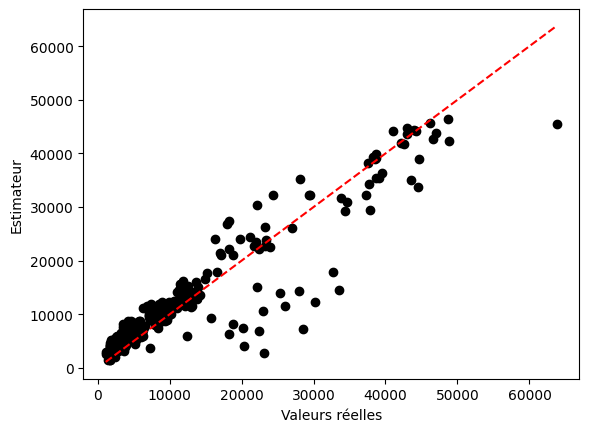

In [ ]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Tracer l'allure de l'estimateur et des données réelles
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Estimateur')
plt.show()

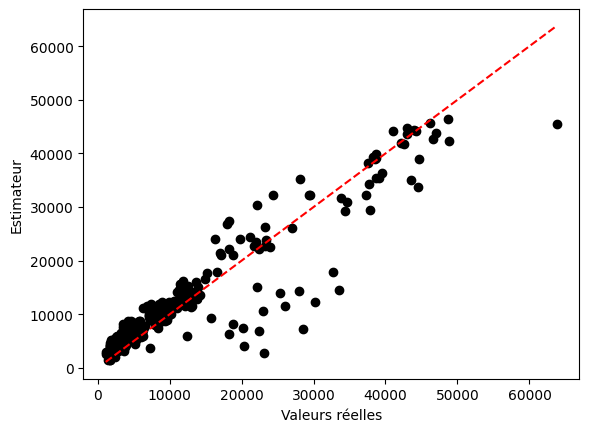

In [ ]:
# Tracer l'allure de l'estimateur et des données réelles
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Estimateur')
plt.show()

In [ ]:
print([y_test.min(), y_test.max()])

[1131.5066, 63770.42801]


### 6.2 Linéaire Regression :

- Testons sans modifier les hypers parametres :

Score du modèle : 0.78


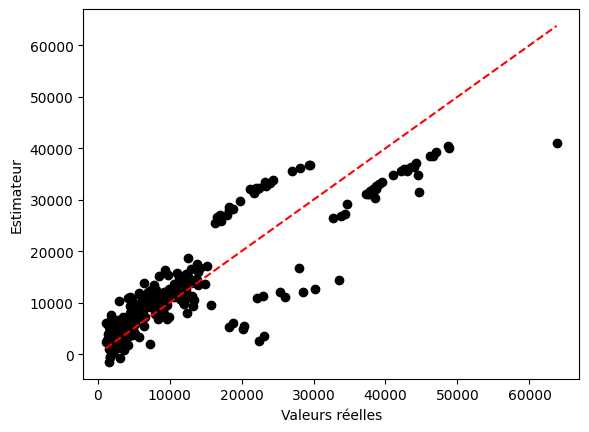

In [ ]:
Linear = LinearRegression()
Linear.fit(X_train, y_train)
y_pred = Linear.predict(X_test)
# Calculer le score du modèle sur l'ensemble de test
score = Linear.score(X_test, y_test)

# Afficher le score
print(f"Score du modèle : {score:.2f}")

# Tracer l'allure de l'estimateur et des données réelles
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Estimateur')
plt.show()

## Pipline 

In [ ]:

# Créer une pipeline avec une étape de normalisation et plusieurs modèles de régression
for i in range(2,30):
    pipeline = Pipeline([
        #('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(metric="euclidean",n_neighbors=i)),
        ('linear', LinearRegression()),
        ('ridge', Ridge(tol=0.0005,alpha=1.0)),
        ('lasso', Lasso(alpha=0.9,max_iter=25)),
        ('elasticnet', ElasticNet()),
        ("forest" , RandomForestRegressor())
    ])

    # Entraîner chaque modèle de la pipeline avec des données d'entraînement et évaluer ses performances sur des données de test
    for name, model in pipeline.named_steps.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"Score du modèle {name}: {score:.3f}")

Score du modèle knn: 0.787
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle lasso: 0.781
Score du modèle elasticnet: 0.683
Score du modèle forest: 0.860
Score du modèle knn: 0.815
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle lasso: 0.781
Score du modèle elasticnet: 0.683
Score du modèle forest: 0.858
Score du modèle knn: 0.829
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle lasso: 0.781
Score du modèle elasticnet: 0.683
Score du modèle forest: 0.856
Score du modèle knn: 0.838
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle lasso: 0.781
Score du modèle elasticnet: 0.683
Score du modèle forest: 0.857
Score du modèle knn: 0.845
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle lasso: 0.781
Score du modèle elasticnet: 0.683
Score du modèle forest: 0.860
Score du modèle knn: 0.854
Score du modèle linear: 0.781
Score du modèle ridge: 0.781
Score du modèle las

## Crosse validation 

In [ ]:

# Créer une pipeline avec une étape de normalisation et plusieurs modèles de régression
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=12)),
    ('linear', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.9,max_iter=25)),
    ('elasticnet', ElasticNet())
])

# Utiliser la validation croisée pour évaluer les performances de chaque modèle de la pipeline

for name, model in pipeline.named_steps.items():
    scores = cross_val_score(model, df_norm, target, cv=7)
    print(f"Score du modèle {name}: {scores.mean():.3f} (+/- {scores.std():.3f})")

Score du modèle knn: -0.082 (+/- 0.063)
Score du modèle linear: -0.011 (+/- 0.011)
Score du modèle ridge: -0.011 (+/- 0.011)
Score du modèle lasso: -0.011 (+/- 0.011)
Score du modèle elasticnet: -0.007 (+/- 0.008)


In [ ]:
# Créer une pipeline avec une étape de normalisation et plusieurs modèles de régression
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor()),
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('elasticnet', ElasticNet())
])

# Définir les grilles de hyperparamètres à tester pour chaque modèle de la pipeline
param_grids = {
    'knn': [{'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15]}],
    'linear': [{}],
    'ridge': [{'alpha': [0.1, 1.0, 10.0]}],
    'lasso': [{'alpha': [0.1, 1.0, 10.0]}],
    'elasticnet': [{'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}]
}

# Créer un objet GridSearchCV pour chaque modèle de la pipeline
for i in range(2,20):
    grid_searches = {}
    for name, model in pipeline.named_steps.items():
        grid_search = GridSearchCV(model, param_grids[name], cv=i)
        grid_searches[name] = grid_search

    # Entraîner chaque modèle de la pipeline avec GridSearchCV
    for name, grid_search in grid_searches.items():
        grid_search.fit(df_norm, target)
        print(f"Meilleurs hyperparamètres du modèle {name}: {grid_search.best_params_}")
        print(f"Score du modèle {name}: {grid_search.best_score_:.3f}")

Meilleurs hyperparamètres du modèle knn: {'n_neighbors': 15}
Score du modèle knn: -0.057
Meilleurs hyperparamètres du modèle linear: {}
Score du modèle linear: -0.010
Meilleurs hyperparamètres du modèle ridge: {'alpha': 10.0}
Score du modèle ridge: -0.010
Meilleurs hyperparamètres du modèle lasso: {'alpha': 10.0}
Score du modèle lasso: -0.010
Meilleurs hyperparamètres du modèle elasticnet: {'alpha': 10.0, 'l1_ratio': 0.1}
Score du modèle elasticnet: -0.004
Meilleurs hyperparamètres du modèle knn: {'n_neighbors': 15}
Score du modèle knn: -0.057
Meilleurs hyperparamètres du modèle linear: {}
Score du modèle linear: -0.010
Meilleurs hyperparamètres du modèle ridge: {'alpha': 10.0}
Score du modèle ridge: -0.010
Meilleurs hyperparamètres du modèle lasso: {'alpha': 10.0}
Score du modèle lasso: -0.010
Meilleurs hyperparamètres du modèle elasticnet: {'alpha': 10.0, 'l1_ratio': 0.1}
Score du modèle elasticnet: -0.004
Meilleurs hyperparamètres du modèle knn: {'n_neighbors': 15}
Score du modèle k

In [ ]:

# Créer une pipeline avec une étape de normalisation, de sélection de variables et plusieurs modèles de régression
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('selector', SelectKBest(f_regression)),
    ('knn', KNeighborsRegressor()),
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('elasticnet', ElasticNet())
])

# Définir les grilles de hyperparamètres à tester pour chaque modèle de la pipeline
param_grids = {
    'knn': [{'n_neighbors': np.arange(2,20)}],
    'linear': [{}],
    'ridge': [{'alpha': [0.1, 1.0, 10.0]}],
    'lasso': [{'alpha': [0.1, 1.0, 10.0]}],
    'elasticnet': [{'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}]
}

# Créer un objet GridSearchCV pour chaque modèle de la pipeline
grid_searches = {}
for name, model in pipeline.named_steps.items():
    if name == 'selector':
        continue
    grid_search = GridSearchCV(model, param_grids[name], cv=7)
    grid_searches[name] = grid_search

# Entraîner chaque modèle de la pipeline avec GridSearchCV
for name, grid_search in grid_searches.items():
    grid_search.fit(df_norm, target)
    print(f"Meilleurs hyperparamètres du modèle {name}: {grid_search.best_params_}")
    print(f"Score du modèle {name}: {grid_search.best_score_:.3f}")
    

Meilleurs hyperparamètres du modèle knn: {'n_neighbors': 19}
Score du modèle knn: -0.052
Meilleurs hyperparamètres du modèle linear: {}
Score du modèle linear: -0.011
Meilleurs hyperparamètres du modèle ridge: {'alpha': 10.0}
Score du modèle ridge: -0.011
Meilleurs hyperparamètres du modèle lasso: {'alpha': 10.0}
Score du modèle lasso: -0.011
Meilleurs hyperparamètres du modèle elasticnet: {'alpha': 10.0, 'l1_ratio': 0.1}
Score du modèle elasticnet: -0.004


In [ ]:
# Créer une pipeline pour l'étape de sélection de variables
feature_selection = Pipeline([
    #('scaler', StandardScaler()),
    ('selector', SelectKBest(f_regression))
])

# Créer une liste de pipelines pour chaque modèle de régression
pipelines = [
    Pipeline([
        ('features', feature_selection),
        ('regression', KNeighborsRegressor(metric="euclidean"))
    ]),
    Pipeline([
        ('features', feature_selection),
        ('regression', LinearRegression())
    ]),
    Pipeline([
        ('features', feature_selection),
        ('regression', Ridge())
    ]),
    Pipeline([
        ('features', feature_selection),
        ('regression', Lasso())
    ]),
    Pipeline([
        ('features', feature_selection),
        ('regression', ElasticNet())
    ]),
    Pipeline([
        ('features', feature_selection),
        ('regression', RandomForestRegressor())
    ]),
]

# Définir les grilles de hyperparamètres à tester pour chaque modèle
param_grids = [
    {
        'features__selector__k': [1,2,3,4,5,6],
        'regression__n_neighbors': [3, 5, 7,8,9,10,11,12,13,14,15,16,17,18],
        
    },
    {
        'features__selector__k': [1,2,3,4,5,6]
    },
    {
        'features__selector__k': [1,2,3,4,5,6],
        'regression__alpha': [0.1, 1.0, 10.0,15,20,25,30]
    },
    {
        'features__selector__k': [1,2,3,4,5,6],
        'regression__alpha': [0.1, 1.0, 10.0,15,20,25,30]
    },
    {
        'features__selector__k': [1,2,3,4,5,6],
        'regression__alpha': [0.1, 1.0, 10.0,15,20,25,30]
    },
    {
        'features__selector__k': [1,2,3,4,5,6],
        'regression__n_estimators': [10, 50, 100,125,150,175]
    }
]

# Créer une liste pour stocker les meilleurs modèles et les meilleurs hyperparamètres
# for i in range(0,20):
for i in range(2,20):
    best_models = []
    best_params = []
    best_score=[]
    best_feature=[]
    # kfold = KFold(n_splits=10)
    # Pour chaque pipeline et grille de hyperparamètres
    for pipeline, param_grid in zip(pipelines, param_grids):
        # Créer un objet de recherche sur grille
        grid_search = GridSearchCV(pipeline, param_grid, cv=i, scoring='r2')
        # Entraîner le modèle sur les données
        grid_search.fit(df_norm, target)
        # Stocker le modèle le plus performant
        best_models.append(grid_search.best_estimator_)
        # Stocker les meilleurs hyperparamètres
        best_params.append(grid_search.best_params_)
        best_score.append(grid_search.best_score_)
        best_feature.append(grid_search._select_best_index)

    # Afficher les meilleurs modèles et hyperparamètres
    for model, params,score, feature in zip(best_models, best_params,best_score,best_feature):
        print(model)
        print(score)
        print(params)
        print(feature)





Pipeline(steps=[('features',
                 Pipeline(steps=[('selector',
                                  SelectKBest(k=2,
                                              score_func=<function f_regression at 0x7f0c20b3f910>))])),
                ('regression',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=16))])
-0.03962726033794339
{'features__selector__k': 2, 'regression__n_neighbors': 16}
<function BaseSearchCV._select_best_index at 0x7f0c312e1bd0>
Pipeline(steps=[('features',
                 Pipeline(steps=[('selector',
                                  SelectKBest(k=1,
                                              score_func=<function f_regression at 0x7f0c20b3f910>))])),
                ('regression', LinearRegression())])
-0.006464900022860931
{'features__selector__k': 1}
<function BaseSearchCV._select_best_index at 0x7f0c312e1bd0>
Pipeline(steps=[('features',
                 Pipeline(steps=[('selector',
                                  SelectKBest(k=1

KeyboardInterrupt: 

In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                            cv=7, scoring='neg_mean_absolute_error',
                                            train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [ ]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_regression, k=6))   


In [ ]:
KNN = make_pipeline(preprocessor, KNeighborsRegressor() )
Linear = make_pipeline(preprocessor,LinearRegression())
Ridge=make_pipeline(preprocessor,Ridge(alpha=1.0))
Lasso=make_pipeline(preprocessor,Lasso())
ElasticNet=make_pipeline(preprocessor,ElasticNet())

In [ ]:
# knn = KNeighborsRegressor()
# Linear = LinearRegression()
# Ridge=Ridge(alpha=1.0)
# Lasso=Lasso()
# ElasticNet=ElasticNet()

In [ ]:
dict_of_models = {'Knn': knn,
                  'Linear' : Linear,
                  'Lasso': Lasso, 
                  'ElasticNet': ElasticNet
                 }

Knn
Linear
Lasso
ElasticNet


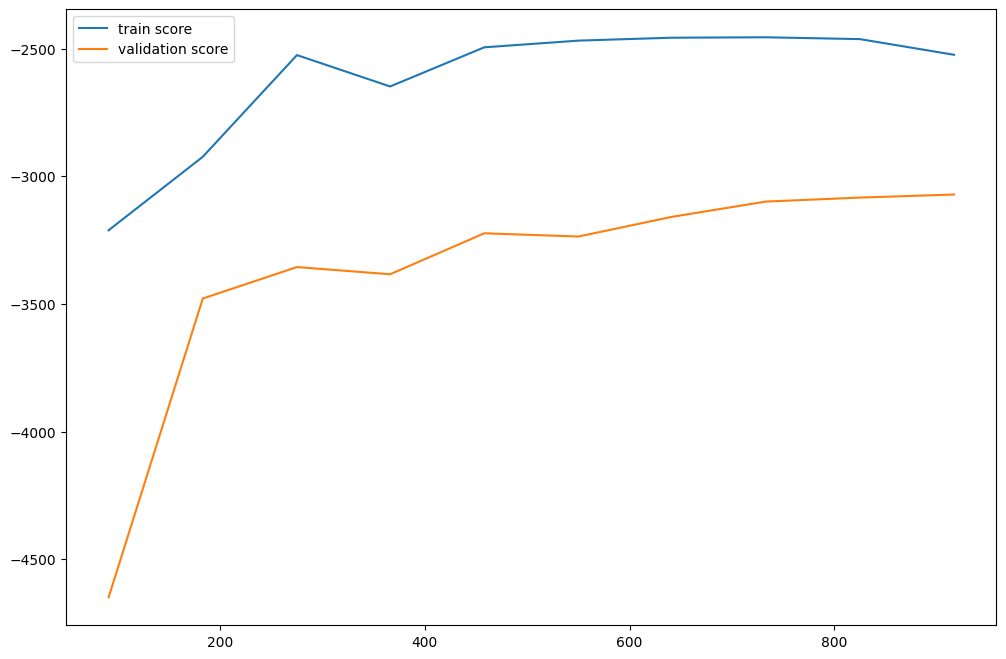

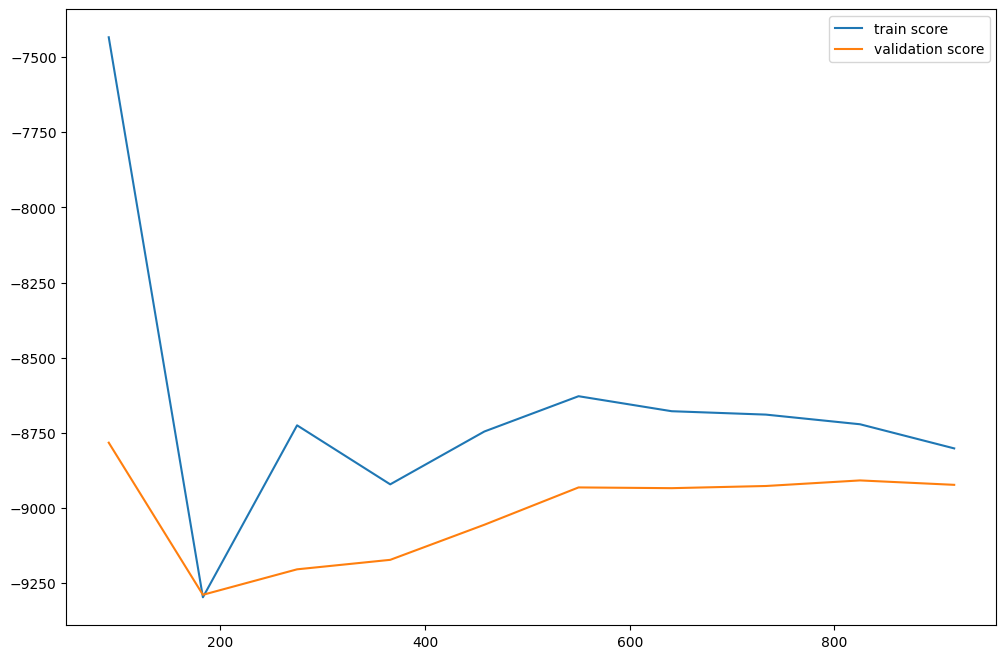

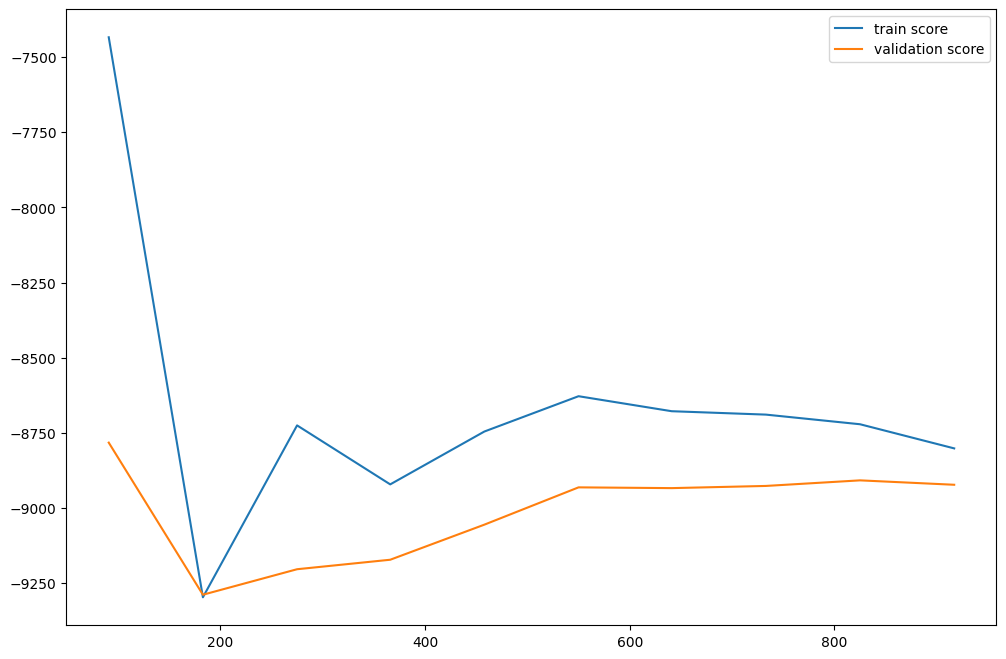

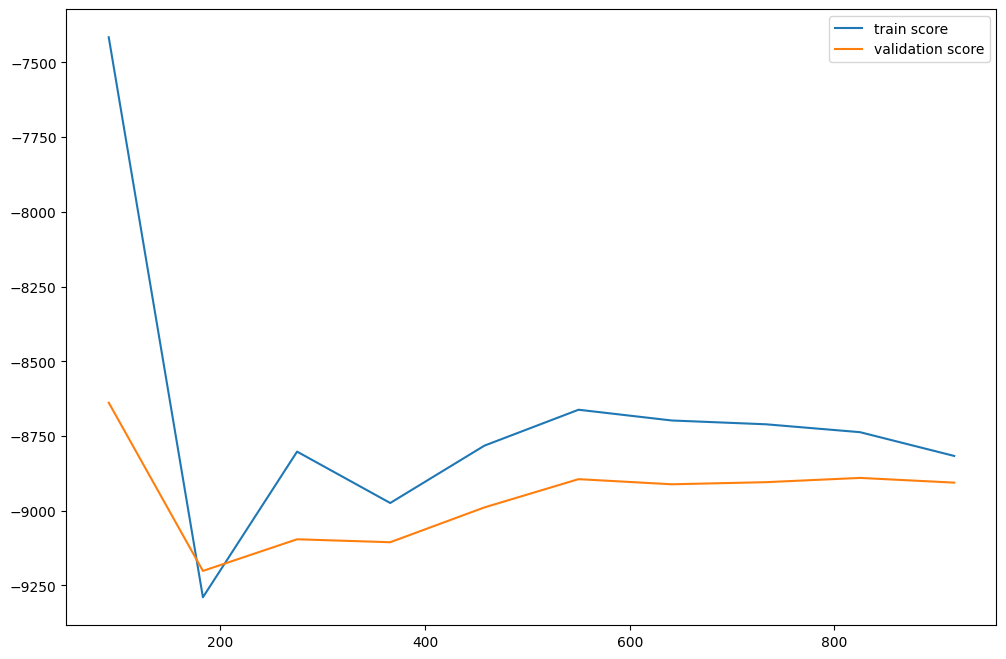

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)